<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски значений</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир



**Описание проекта**

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** —  научиться определять рыночную стоимость объектов недвижимости. Осуществить анализ данных для дальнейшего построения автоматизированной системы, которая позволит отследить аномалии и мошенническую деятельность.

Предварительно необходимо осуществить предобработку данных, посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Ход исследования**

Данные о  платёжеспособности клиентов мы  получим из файла `data.csv`. О качестве данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Изучение данных.
 2. Предобработка данных.
 3. Расчёт и добавление данных.
 3. Анализ данных.

## Изучение данных из файла

Составим первое представление о данных сервиса Яндекc Недвижимость.


Импортируем  библиотеки `pandas`, `numpy`, `matplotlib` и `seaborn`

In [1]:
# импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Прочитаем файл `real_estate_data.csv` из папки `/datasets` и сохраним его в переменной `df`:

In [2]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv(
        'D:\\Аналитик данных\\Яндекс-практикум\\Sprint3\\real_estate_data.csv', sep='\t')

Выведим на экран первые десять строк таблицы:

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице двадцать два столбца. Тип данных: `int, float, object, bool`.   

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении 




В названии колонок  `cityCenters_nearest`,`parks_around3000`,`ponds_around3000` видно нарушение стиля.  

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать. 

После замены пустых значений в столбце `balcony` преобразуем его в тип int.

Уберем копейки из стобца  `last_price`, преобразовав его в тип int.

Заменим тип float столбца `floors_total` на int.

Заметим, что в столбце `first_day_exposition` дату публикации указали  в формате ISO. Значит, сначала слитно идут год, месяц, день; затем буквенный разделитель даты и времени T; затем часы, минуты и секунды — снова слитно.
Вещественный тип данных в столбце `first_day_exposition` заменим на значения формата datetime.

Также, согласно документации, столбец `is_apartment` принадлежит к булевому типу, но по факту относится к типу object. Исправим эту ситуацию.


Проверим данные на строки-дубликаты.


### Вывод

В каждой строке таблицы — данные об объекте недвижимости . Часть данных вписана пользователем, другая — получена автоматически на основе картографических данных. 

Предварительно можно утверждать, что, данных достаточно для проведения исследования. Но встречаются пропуски в данных, часть колонок необходимо преобразовать в другой тип данных и исправить их название.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Исправим стиль в заголовках столбцов, исключим пропуски, приведём данные к нужным типам. Затем проверим данные на дубликаты.

### Стиль заголовков

Выведем на экран названия столбцов:

In [5]:
# перечень названий столбцов таблицы df

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»;
* все символы сделаем строчными;
* переименуем `'floor'` → `'floor_number'`, чтобы избежать проблемы при работе с методом query().

Для этого переименуем колонки так:
* `'cityCenters_nearest'` → `'distance_to_city_centers'`;
* `'parks_around3000'` → `'parks_around_3000'`;
* `'ponds_around3000'` → `'ponds_around_3000'`;
* `'floor'` → `'floor_number'`.


In [6]:
# переименование столбцов

df = df.rename(
    columns={
        'cityCenters_nearest': 'distance_to_city_centers',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000',
        'floor': 'floor_number'
    }
)

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [7]:
# проверка результатов - перечень названий столбцов

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area',
       'floor_number', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
       'balcony', 'locality_name', 'airports_nearest',
       'distance_to_city_centers', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия столбцов изменены, теперь посмотрим на пропуски.

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [8]:
# подсчёт пропусков

df.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height               9195
floors_total                   86
living_area                  1903
floor_number                    0
is_apartment                20924
studio                          0
open_plan                       0
kitchen_area                 2278
balcony                     11519
locality_name                  49
airports_nearest             5542
distance_to_city_centers     5519
parks_around_3000            5518
parks_nearest               15620
ponds_around_3000            5518
ponds_nearest               14589
days_exposition              3181
dtype: int64

Таким образом мы обнаружили пропущенные значения в четырнадцати из двадцати двух столбцов.

Проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками. Для этого будем использовать цикл и полученные значения выведем на экран.

In [9]:
# доля пропущенных значений в %

for name in df.columns:
    if df[name].isna().sum() > 0:

        display(
            f' {name.ljust(25)} {df[name].isna().sum() / (df[name].isna().sum() + df[name].count()): .2%}')

' ceiling_height             38.80%'

' floors_total               0.36%'

' living_area                8.03%'

' is_apartment               88.29%'

' kitchen_area               9.61%'

' balcony                    48.61%'

' locality_name              0.21%'

' airports_nearest           23.38%'

' distance_to_city_centers   23.29%'

' parks_around_3000          23.28%'

' parks_nearest              65.91%'

' ponds_around_3000          23.28%'

' ponds_nearest              61.56%'

' days_exposition            13.42%'

Заметим, что наряду с большими значениями в столбцах `ceiling_height`,`is_apartment `,`balcony`,`parks_nearest`,`parks_nearest`,`ponds_nearest` существуют незначительные пропуски в  `floors_total`,`locality_name`.

Рассмотрим столбцы с пропусками по отдельности.

Выведем первые 10 строк на экран, чтобы проанализировать пустые значения

In [10]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Рассмотрим столбец `ceiling_height`. Здесь встречаются значения NaN.
Такие значения указывают, что данных нет. NaN замещает отсутствующее в ячейке число и принадлежит к типу float, поэтому с ним можно проводить математические операции. 
Ввиду того, что процентов пропусков порядка 39 %, мы не можем избавиться от этих значений, просто их удалив. 
 Нам предстоит работать с пропусками  в количественных переменных. Пропуски в таких переменных заполняют характерными значениями. Это значения, характеризующие состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое или медиана.Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. Поэтому для нашего случая лучше использовать медианное значение. Обычно потолки соответствуют строительным стандартам. Скорее всего, люди, не зная высоту потолка, оставляли незаполненное поле.    

Выполним заполнение медианой.

In [11]:
# Подсчёт медианы и заполнение значений NaN
median = df['ceiling_height'].median()

df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = median

Осуществим проверку.

In [12]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [13]:
df['ceiling_height'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Рассмотрим столбец `floors_total`, для этого выведем первые 5 строк с пустыми значениями.

In [14]:
df[df['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Предположим, что кол-во этажей  `floors_total` не было заполнено, т.к. здание является одноэтажным. Посмотрим на строку под индексом 457 и обнаружим, что в столбце `floor_number`кол-во этажей равняется 12. Т.о. наше предположение не верно. Всего мы имеем 0,36 % подобных строк, что гораздо меньше 5%, поэтому осуществим их удаление.


In [15]:
# удаление строк с пропусками в столбцах, перечисленных в списке subset
df = df.dropna(subset=['floors_total'])

Осуществим проверку.

In [16]:
df['floors_total'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Рассмотрим столбец `locality_name `, для этого выведем первые 5 строк с пустыми значениями.

In [17]:
df[df['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Возможно, пустые значения связаны с человеческим фактором. Всего мы имеем 0,21 % подобных строк, что гораздо меньше 5%, поэтому осуществим их удаление.


In [18]:
# удаление строк с пропусками в столбцах, перечисленных в списке subset
df = df.dropna(subset=['locality_name'])

Осуществим проверку.

In [19]:
df['floors_total'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Рассмотрим столбец `balcony`, для этого выведем первые 5 строк с пустыми значениями.

In [20]:
df[df['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Eсли человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Осуществим замену,используя loc.


In [21]:
df.loc[df['balcony'].isna(), 'balcony'] = 0

Осуществим проверку.

In [22]:
df['balcony'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Рассмотрим столбец `is_apartment`, для этого выведем первые 5 строк с пустыми значениями.

In [23]:
df[df['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество пропущенных значений порядка 88%, что очень значительно. 

Aпартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания. 

Скорее всего, люди не понимали, что такое апартаменты, поэтому оставляли это поле пустым. 

Заполним пустые ячейки значениями False,используя метод fillna().


In [24]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Осуществим проверку.

In [25]:
df['is_apartment'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Посмотрим на наш датафрейм и столбцы `living_area` и `kitchen_area`.

In [26]:
# вывод таблицы
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Кол-во пропусков 8% и 9.6% соответственно. Скорее всего, поле не было заполнено, т.к. люди не знали, точную жилую и кухонную площадь своей недвижимости. Заполним пустые поля медианными значениями с группировкой по названию населенного пункта.

In [27]:
# Заполнение медианными значениями колонкок living_area и kitchen_area
for city in df['locality_name'].unique():

    median = df.loc[df['locality_name'] == city, 'living_area'].median()
    median2 = df.loc[df['locality_name'] == city, 'kitchen_area'].median()

    df.loc[(df['living_area'].isna()) & (
        df['locality_name'] == city), 'living_area'] = median

    df.loc[(df['kitchen_area'].isna()) & (
        df['locality_name'] == city), 'kitchen_area'] = median2

Осуществим проверку.

In [28]:
df['living_area'].isna().sum()

17

In [29]:
df['kitchen_area'].isna().sum()

19

Заметим, что нам не удалось заменить все значения NaN. Выведем на экран таблицу с пустыми значениями по столбцу `living_area`, а также данные по кол-ву населенных пунктов в выборке.

In [30]:
df.loc[df['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
986,10,1950000.0,62.0,2015-02-19T00:00:00,3,2.65,5.0,NaN,5,False,...,NaN,0.0,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.0,2016-11-28T00:00:00,1,2.65,3.0,NaN,3,False,...,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,2.65,18.0,NaN,4,False,...,NaN,0.0,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3334,10,1100000.0,41.0,2019-04-05T00:00:00,2,2.65,2.0,NaN,2,False,...,7.2,0.0,деревня Пчева,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4982,5,3381777.0,65.6,2017-12-09T00:00:00,2,2.65,17.0,NaN,17,False,...,NaN,0.0,деревня Лаврики,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [31]:
df.loc[df['living_area'].isna(), 'locality_name'].value_counts()

деревня Тарасово                2
поселок Севастьяново            1
деревня Иссад                   1
посёлок Петро-Славянка          1
деревня Пчева                   1
деревня Лаврики                 1
посёлок Левашово                1
деревня Хязельки                1
поселок станции Лужайка         1
поселок Красносельское          1
деревня Вахнова Кара            1
посёлок Плоское                 1
деревня Раздолье                1
городской посёлок Свирьстрой    1
деревня Русско                  1
поселок Пчевжа                  1
Name: locality_name, dtype: int64

Таким образом, для данных строк невозможно осуществить заполнение медианными значениями с группировкой, т.к. по данным объектам недвижимости нет данных в стобцах `living_area` 
, `kitchen_area` и подобные объекты встречаются в единичных экземплярах. Ввиду их малого кол-ва в процентном соотношении осуществим их удаление, используя метод dropna(), и выполним проверку.

In [32]:
df = df.dropna(subset=['living_area', 'kitchen_area'])

In [33]:
# Проверка на пустые значения столбца living_area
df['living_area'].isna().sum()

0

In [34]:
# Проверка на пустые значения столбца kitchen_area
df['kitchen_area'].isna().sum()

0

Теперь пустые  значения отсутствуют.

Рассмотрим столбцы, которые были заполнены на основе картографических данных: `airports_nearest`,            
`distance_to_city_centers`,   
`parks_around_3000`,           
`parks_nearest`,               
`ponds_around_3000`,          
`ponds_nearest`. В каждом из них NaN превышают 20%. Возможно, данные о географическом положении данных объектов отсутствовали и именно с этим связано большое кол-во пропусков. Заменим пустые значения медианой с группировкой по населенному пункту, учитывая, что если кол-во парков, водоемов на расстоянии около 3000 метров равно 0, то значения в стобцах `parks_nearest`, `ponds_nearest` должны оставаться пустыми, исходя из здравого смысла.

In [35]:
#Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,31.3,9,False,...,9.9,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заметим, что во-второй строке в колонках `parks_around_3000`, `ponds_around_3000` нулевые значения и соответственно `parks_nearest`, `ponds_nearest` равны NaN. Посмотрим нет ли аномальных значений в столбцах `parks_nearest`, `ponds_nearest`, используя метод nlargest().

In [36]:
df['parks_nearest'].nlargest()

10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

In [37]:
df['ponds_nearest'].nlargest()

20726    1344.0
19138    1341.0
19924    1341.0
1476     1337.0
12054    1313.0
Name: ponds_nearest, dtype: float64

Аномалии не найдены. Посмотрим кол-во пустых значений и осуществим их замену медианой.

In [38]:
# кол-во пустых значений
df.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                     0
floor_number                    0
is_apartment                    0
studio                          0
open_plan                       0
kitchen_area                    0
balcony                         0
locality_name                   0
airports_nearest             5506
distance_to_city_centers     5483
parks_around_3000            5482
parks_nearest               15515
ponds_around_3000            5482
ponds_nearest               14510
days_exposition              3169
dtype: int64

In [39]:
# Заполнение медианными значениями колонкок airports_nearest,
# distance_to_city_centers, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest
# с группировкой по населеному пункту

for city in df['locality_name'].unique():

    median = df.loc[df['locality_name'] == city, 'airports_nearest'].median()
    median2 = df.loc[df['locality_name'] == city, 'distance_to_city_centers'].median()
    median3 = df.loc[df['locality_name'] == city, 'parks_around_3000'].median()
    median4 = df.loc[df['locality_name'] == city, 'parks_nearest'].median()
    median5 = df.loc[df['locality_name'] == city, 'ponds_around_3000'].median()
    median6 = df.loc[df['locality_name'] == city, 'ponds_nearest'].median()

    df.loc[(df['airports_nearest'].isna()) & (
        df['locality_name'] == city), 'airports_nearest'] = median

    df.loc[(df['distance_to_city_centers'].isna()) & (
        df['locality_name'] == city), 'distance_to_city_centers'] = median2

    df.loc[(df['parks_around_3000'].isna()) & (
        df['locality_name'] == city), 'parks_around_3000'] = median3

    df.loc[(df['parks_nearest'].isna()) & (
        df['locality_name'] == city) & (
        df['parks_around_3000'] != 0), 'parks_nearest'] = median4

    df.loc[(df['ponds_around_3000'].isna()) & (
        df['locality_name'] == city), 'ponds_around_3000'] = median5

    df.loc[(df['ponds_nearest'].isna()) & (
        df['locality_name'] == city) & (
        df['ponds_around_3000'] != 0), 'ponds_nearest'] = median6

Проверим датафрейм на пустые значения.

In [40]:
# кол-во пустых значений после заполнения медианой с группировкой по населеному пункту
df.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                     0
floor_number                    0
is_apartment                    0
studio                          0
open_plan                       0
kitchen_area                    0
balcony                         0
locality_name                   0
airports_nearest             5414
distance_to_city_centers     5414
parks_around_3000            5414
parks_nearest               15514
ponds_around_3000            5414
ponds_nearest               14447
days_exposition              3169
dtype: int64

Заметим, что нам не удалось заменить пустые значения полностью, опираясь на группировку по населеному пункту.

In [41]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,31.3,9,False,...,9.9,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Рассмотрим датафрейм с пустыми значениями, опираясь на столбец `airports_nearest` 

In [42]:
df[df['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,28.70,2,False,...,8.35,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [43]:
# анализ уникальных значений
df.loc[df['airports_nearest'].isna(), 'locality_name'].value_counts().head()

посёлок Мурино     520
Всеволожск         398
Гатчина            307
деревня Кудрово    299
Выборг             237
Name: locality_name, dtype: int64

Мы не можем просто удалить столбцы, т.к. это составит гораздо больше 5% от всего датафрема. Единственный вариант - заменить оставшиеся пустые значения медианой по столбцу. Выполним данные действия и оценим результат.

In [44]:
# Заполнение медианными значениями колонок airports_nearest, distance_to_city_centers,
# parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest

# Определение медианы
median = int(df['airports_nearest'].median())
median2 = int(df['distance_to_city_centers'].median())
median3 = int(df['parks_around_3000'].median())
median4 = int(df['parks_nearest'].median())
median5 = int(df['ponds_around_3000'].median())
median6 = int(df['ponds_nearest'].median())

# Использование метода fillna()
df.fillna(value={'airports_nearest': median, 'distance_to_city_centers': median2,
                 'parks_around_3000': median3,
                 'ponds_around_3000': median5}, inplace=True)

# Заполнение медианой столбцов parks_nearest и ponds_nearest

df.loc[(df['parks_nearest'].isna()) & (
    df['parks_around_3000']) != 0, 'parks_nearest'] = median4
df.loc[(df['ponds_nearest'].isna()) & (
    df['ponds_around_3000'] != 0), 'ponds_nearest'] = median6

Проверим датафрейм на пустые значения.

In [45]:
# кол-во пустых значений после заполнения медианой
df.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                     0
floor_number                    0
is_apartment                    0
studio                          0
open_plan                       0
kitchen_area                    0
balcony                         0
locality_name                   0
airports_nearest                0
distance_to_city_centers        0
parks_around_3000               0
parks_nearest               15514
ponds_around_3000               0
ponds_nearest                9033
days_exposition              3169
dtype: int64

Проверим существуют ли NaN в столбце `'parks_nearest'`, если `'parks_around_3000'` не равен нулю.

In [46]:
df.loc[(df['parks_nearest'].isna()) & (
    df['parks_around_3000'] != 0)]['parks_nearest'].count()

0

Выполним идентичные действия для столбца `'ponds_nearest'`

In [47]:
df.loc[(df['ponds_nearest'].isna()) & (
    df['ponds_around_3000'] != 0)]['ponds_nearest'].count()

0

Таким образом, нулевым значениям в столбцах `'parks_around_3000'`, `'ponds_around_3000'` соответствуют пустые значения в столбцах `'parks_nearest'`,`'ponds_nearest'`, что достаточно логично. 

Рассмотрим столбец `days_exposition` и выявим зависимость пустых значений со столбцом `first_day_exposition`. Для это, для начала, преобразуем столбец `first_day_exposition` в удобный для восприятия формат.

In [48]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

Зададим новый столбец, который определяет пропущена дата или нет.

In [49]:
df['days_exposition_missing'] = df['days_exposition'].isna().astype(int)

Построим график зависимости пропусков от набдюдаемого периода.

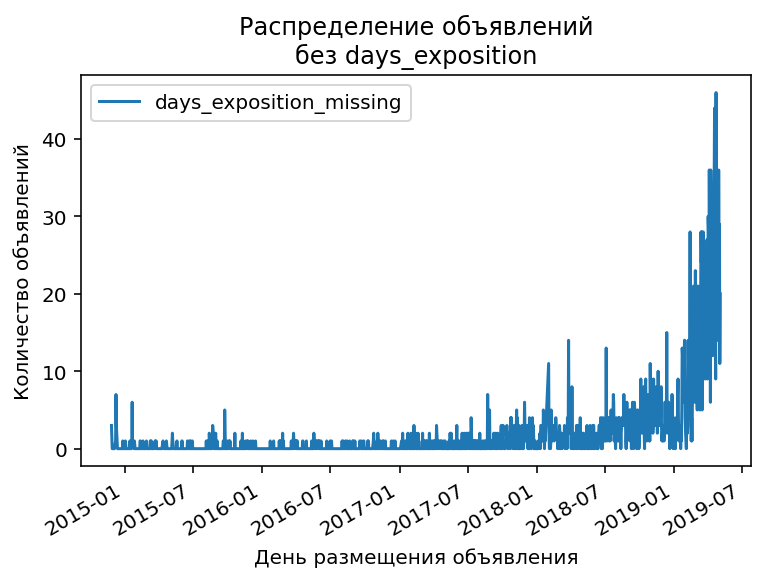

In [50]:
df.groupby('first_day_exposition').agg(
    {'days_exposition_missing': 'sum'}).plot()
plt.xlabel("День размещения объявления"), plt.ylabel("Количество объявлений")
plt.title('Распределение объявлений\nбез days_exposition')
plt.show()

Число пропусков растет к концу наблюдаемого периода. Видимо, пропуски означают незакрытые объявления. 

Будем считать, что дата выгрузки данных равна последнему дню наблюдений. Оставим пропущенные значения, т.к. они свидетельствуют, что объявления не были сняты с показа.

### Изменение типов данных.

Посмотрим на тип данных, применив метод info() к датафрейму.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23545 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23545 non-null  int64         
 1   last_price                23545 non-null  float64       
 2   total_area                23545 non-null  float64       
 3   first_day_exposition      23545 non-null  datetime64[ns]
 4   rooms                     23545 non-null  int64         
 5   ceiling_height            23545 non-null  float64       
 6   floors_total              23545 non-null  float64       
 7   living_area               23545 non-null  float64       
 8   floor_number              23545 non-null  int64         
 9   is_apartment              23545 non-null  bool          
 10  studio                    23545 non-null  bool          
 11  open_plan                 23545 non-null  bool          
 12  kitchen_area      

In [52]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,1
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,31.3,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0


Уберем копейки из стобца `last_price`, преобразовав его в тип int.

In [53]:
df['last_price'] = df['last_price'].astype('int')

Заменим тип float столбца `floors_total` на int, т.к. вряд ли существует недвижимость с дробными этажами.

In [54]:
df['floors_total'] = df['floors_total'].astype('int')

Cтолбец `balcony` преобразуем  в тип int. Сложно представить 1.2 балкона.

In [55]:
df['balcony'] = df['balcony'].astype('int')

Уберем сантиметры из стобцов `airports_nearest`, `distance_to_city_centers`, `parks_around_3000`, `ponds_around_3000`,  преобразовав их в тип int


In [56]:
df[['airports_nearest', 'distance_to_city_centers', 'parks_around_3000', 'ponds_around_3000']] = df[[
    'airports_nearest', 'distance_to_city_centers', 'parks_around_3000', 'ponds_around_3000']].astype('int', errors='ignore')

В стобцах `parks_nearest`,	`ponds_nearest`,	`days_exposition` есть пустые значения, поэтому оставим тип float.

Осуществим проверку.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23545 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23545 non-null  int64         
 1   last_price                23545 non-null  int32         
 2   total_area                23545 non-null  float64       
 3   first_day_exposition      23545 non-null  datetime64[ns]
 4   rooms                     23545 non-null  int64         
 5   ceiling_height            23545 non-null  float64       
 6   floors_total              23545 non-null  int32         
 7   living_area               23545 non-null  float64       
 8   floor_number              23545 non-null  int64         
 9   is_apartment              23545 non-null  bool          
 10  studio                    23545 non-null  bool          
 11  open_plan                 23545 non-null  bool          
 12  kitchen_area      

In [58]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,NaN,1
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558.0,0
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,0,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424.0,0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121.0,0


###  Удаление дубликатов.


Посчитаем явные дубликаты в таблице одной командой

In [59]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

Дубликаты отсутствуют, можем двигаться дальше.

### Вывод

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- несоответствия в типе данных.

Мы исправили заголовки, чтобы упростить работу с таблицей.

Пропущенные значения мы заменили, опираясь на здравый смысл: нулями и медианными значениями. Часть пропущенных значений оставили не заполенными, т.к отсутствие значения — тоже важный сигнал, который не нужно прятать.

Дабы упростить восприятие таблицы привели даты к привычному формату, а также заменили, где это уместно тип int на float. 


Теперь можно перейти к расчетам и добавлению результатов в таблицу. 

## Расчёты и добавление результатов в таблицу

Рассмотрим нашу таблицу.

In [60]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,balcony,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,NaN,1
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558.0,0
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,0,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424.0,0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121.0,0


Посчитаем  и добавим в таблицу цену квадратного метра. Поделим последнюю цену `last_price` на площадь квартиры в квадратных метрах и запишем данные в столбец `price_square_meter`.

In [61]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).astype('int')

Оценим результат.

In [62]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,locality_name,airports_nearest,distance_to_city_centers,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863,16028,1,482.0,2,755.0,NaN,1,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,0,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558.0,0,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424.0,0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121.0,0,100000


Видим, что цена квадратного метра в Санкт-Петербурге (первая строчка) 120 370 рублей.

Посчитаем  и добавим в таблицу день недели, месяц и год публикации объявления. Получим данные сведения из столбца `first_day_exposition`.

In [63]:
# День недели
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()


In [64]:
df['day_number'] = pd.DatetimeIndex(df['first_day_exposition']).day_of_week

In [65]:
# Месяц
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [66]:
# Год
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Оценим результат.

In [67]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,1,120370,Thursday,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,0,82920,Tuesday,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,0,92785,Thursday,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,84.0,3,234.0,424.0,0,408176,Friday,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,0,100000,Tuesday,1,6,2018


Видно, что вторая квартира(строка под индексом 1) была продана во вторник в декабре 2018 года.

Посчитаем  и добавим в таблицу этаж квартиры(первый, последний, другой). 

Создадим функцию `grouped_floor_func`, которая на основании данных из столбцов `floors_total`,` floor_number` сформирует новый столбец `grouped_floor`, в который войдут следующие категории: 'первый', 'последний', 'другой.

Опишем функцию.

In [68]:
# Функции для группировки этажа квартиры по категориям: первый, последний, другой.
def grouped_floor_func(row):
    total = row['floors_total']
    number = row['floor_number']
    if total == number:
        return 'последний'
    elif number == 1:
        return 'первый'
    else:
        return 'другой'

Применим метод apply() к датафрейму совместно с функцией grouped_floor_func, чтобы осуществить группировку на категории.

In [69]:
df['grouped_floor'] = df.apply(grouped_floor_func, axis=1)

Оценим результат.

In [70]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,1,120370,Thursday,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,0,82920,Tuesday,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,0,92785,Thursday,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,3,234.0,424.0,0,408176,Friday,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,0,100000,Tuesday,1,6,2018,другой


In [71]:
# анализ уникальных значений
df['grouped_floor'].value_counts()

другой       17321
последний     3344
первый        2880
Name: grouped_floor, dtype: int64

Меньше всего объектов на первом этаже.

Посчитаем  и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей. Создадим два дополнительных столбца `ratio_living_total_area`, `ratio_kitchen_total_area`

In [72]:
df['ratio_living_total_area'] = (df['living_area'] / df['total_area']).round(3)
df['ratio_kitchen_total_area'] = (df['kitchen_area'] / df['total_area']).round(3)

Оценим результат.

In [73]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,NaN,1,120370,Thursday,3,3,2019,другой,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.3,9,False,...,424.0,0,408176,Friday,4,7,2015,другой,0.197,0.062
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410


### Вывод 

Мы посчитали и добавили в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Теперь можно приступить к исследовательскому анализу данных. 


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Последовательно построим гистограммы для каждого параметра, предварительно проанализировав медианы, средние и уникальные значения.

Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала.

In [74]:
# анализ медианы и среднего значения
df['total_area'].describe()

count    23545.000000
mean        60.326102
std         35.650839
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [75]:
# анализ уникальных значений
df['total_area'].value_counts()

45.00     419
42.00     383
31.00     346
60.00     345
44.00     343
         ... 
58.71       1
60.75       1
63.19       1
237.00      1
76.75       1
Name: total_area, Length: 2158, dtype: int64

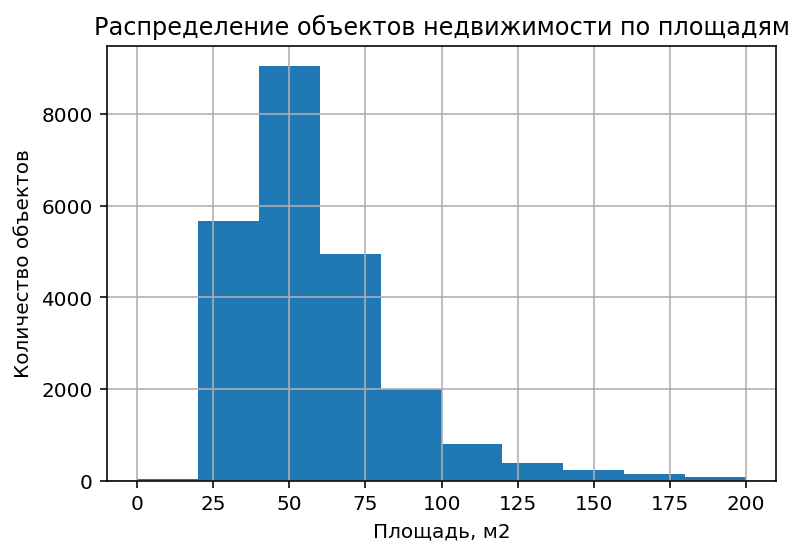

In [76]:
# Построение гистограммы по площади
plt.hist(df['total_area'], range=(0, 200))
plt.grid()
plt.xlabel("Площадь, м2"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по площадям')
plt.show()

Видно, что наибольшее число объектов имеют площадь порядка 45-55 м2.

In [77]:
# анализ медианы и среднего значения
df['last_price'].describe()

count    2.354500e+04
mean     6.543631e+06
std      1.091468e+07
min      1.219000e+04
25%      3.415000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [78]:
# анализ уникальных значений
df['last_price'].value_counts()

4500000     341
3500000     289
4300000     260
4000000     260
4200000     257
           ... 
9480000       1
22743212      1
10480000      1
7995000       1
11475000      1
Name: last_price, Length: 2924, dtype: int64

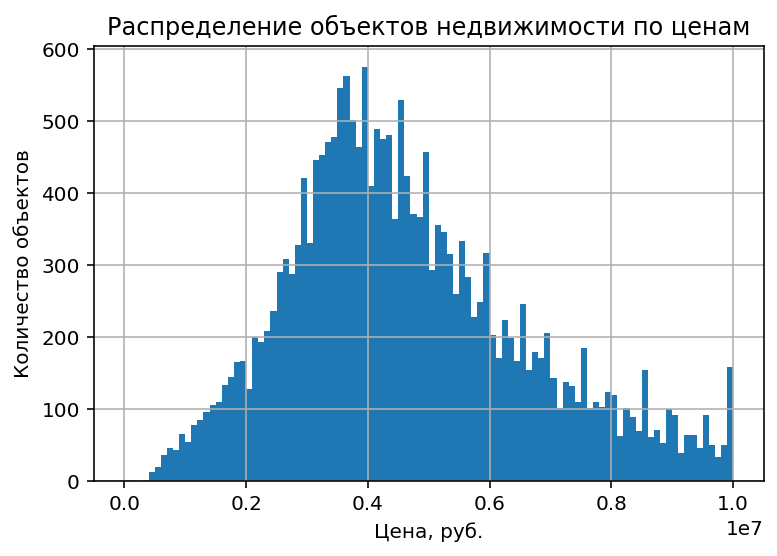

In [79]:
# Построение гистограммы по цене
plt.hist(df['last_price'],bins=100,range=(0,10000000) )
plt.grid()
plt.xlabel("Цена, руб."), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по ценам')
plt.show()

Видно, что наибольшее число объектов имеют цену порядка 4-4.5 млн.руб.

In [80]:
# анализ медианы и среднего значения
df['rooms'].describe()

count    23545.000000
mean         2.070801
std          1.078529
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [81]:
# анализ уникальных значений
df['rooms'].value_counts()

1     7999
2     7889
3     5775
4     1172
5      324
0      192
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

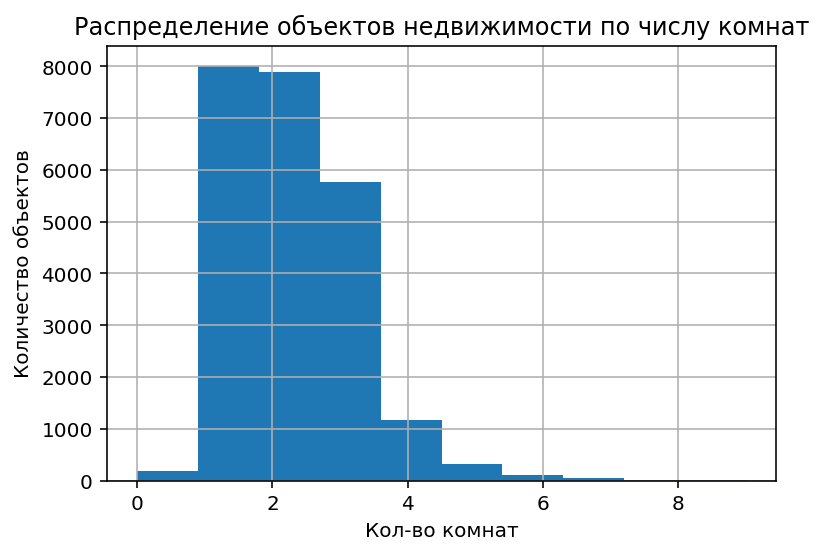

In [82]:
# Построение гистограммы по числу комнат
plt.hist(df['rooms'], range=(0,9) )
plt.grid()
plt.xlabel("Кол-во комнат"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по числу комнат')
plt.show()

Видно, что наибольшее число объектов имеют 1-2 комнаты.

In [83]:
# анализ медианы и среднего значения
df['ceiling_height'].describe()

count    23545.000000
mean         2.724600
std          0.991439
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [84]:
# анализ уникальных значений
df['ceiling_height'].value_counts()

2.65    9742
2.50    3513
2.60    1645
2.70    1571
3.00    1107
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

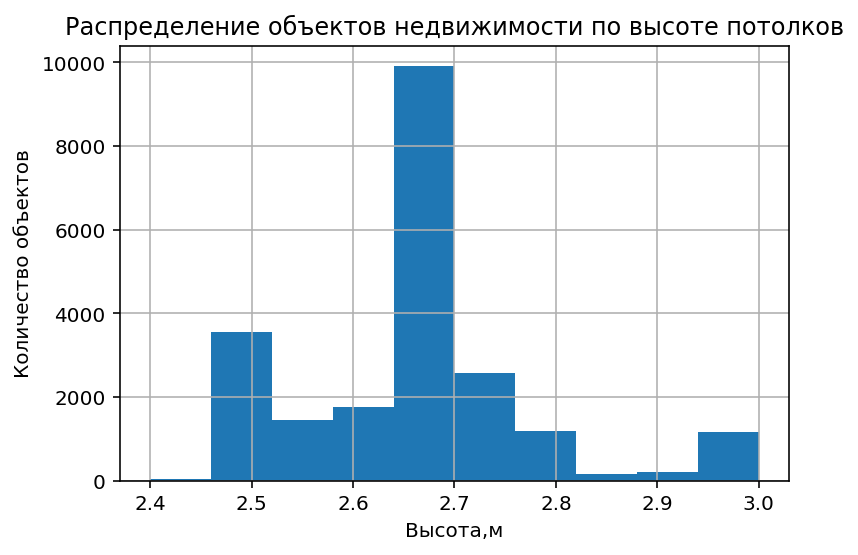

In [85]:
# Построение гистограммы по высоте потолков
plt.hist(df['ceiling_height'], range=(2.4, 3))
plt.grid()
plt.xlabel("Высота,м"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по высоте потолков')
plt.show()

Видно, что наибольшее число объектов имеют высоту порядка 2.65 метра.

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

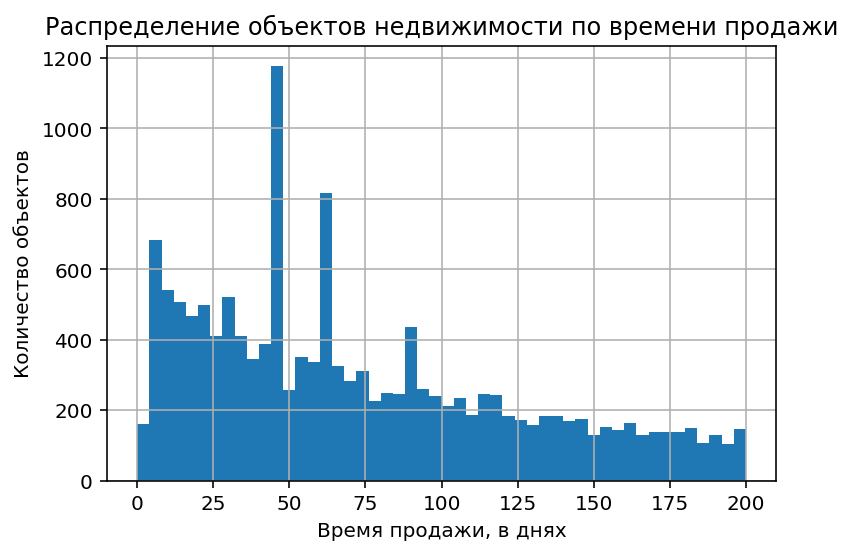

In [86]:
# Построение гистограммы по времени продажи квартиры
plt.hist(df['days_exposition'],bins=50, range=(0,200))
plt.grid()
plt.xlabel("Время продажи, в днях"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по времени продажи')
plt.show()

In [87]:
# определение медианы и среднего значения
df['days_exposition'].describe()

count    20376.000000
mean       180.767030
std        219.706953
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Заметим, что судя по гистограмме время продажи большинства квартир составляет около 45 дней, в то время как среднее и медианное время составляют 180 и 95 дней соответственно. В ввиду того, что гистрограмма достаточно сильно подвержена изменениям от числа корзин и отсутствию нормального распределения, будем ориентироваться на медиану.

Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго. 

Помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего и насколько их много.


Самое простое, что можно посчитать для оценки разброса, — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

Увидеть медиану и квартили в Python можно на специальном графике. Его называют диаграммой размаха или «ящиком с усами».

«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.
«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».

Границы усов будем считать по формулам:

High = df['x'].quantile(0.99)

Low = df['x'].quantile(0.01)

Все, что окажется за пределыми границ усов будем считать выбросами и избавимся от этих значений.

Посмотрим на гистограмму.

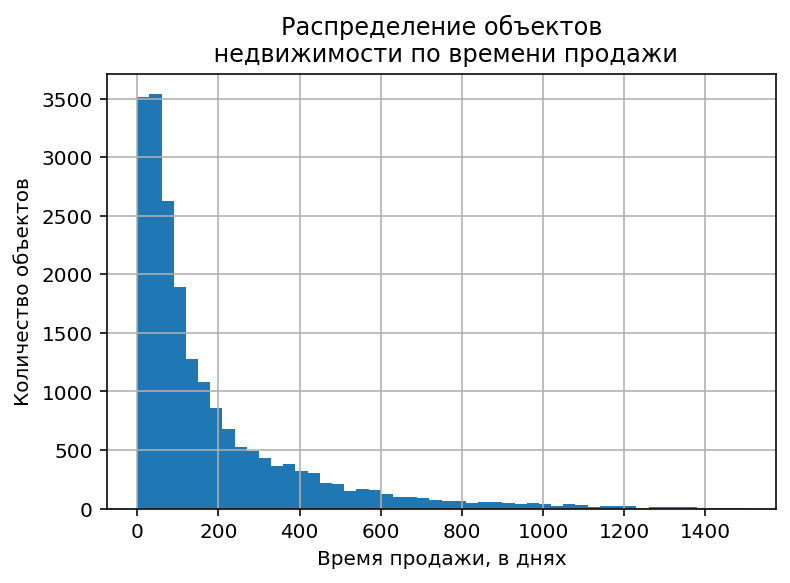

In [88]:
# Построение гистограммы по времени продажи квартиры
plt.hist(df['days_exposition'],bins=50, range=(0,1500))
plt.grid()
plt.xlabel("Время продажи, в днях"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов\n недвижимости по времени продажи')
plt.show()

Продажи продолжительностью 1000 дней — уже редки. Дольше 1200 дней почти никто не продает. А на участке более 1300 дней гистограмма сливается с нулём (это не значит, что там ровно 0, но таких продаж единицы). 

Получим более точные цифры используя формулу для верхней и нижней  границы усов диаграммы размаха.

In [89]:
# верхняя граница
df['days_exposition'].quantile(0.99)

1067.0

In [90]:
# нижняя граница
df['days_exposition'].quantile(0.01)

4.0

Т.о. всё, что продавалось больше 1067 дней и быстрее четырех, можно отсеить, используя метод query().

In [91]:
df.query(' 4 <= days_exposition <= 1067', inplace=True)

Осущестивим проверку.

In [92]:
# Вывод наибольших значений столбца
df['days_exposition'].nlargest()

3570     1067.0
7521     1067.0
14227    1066.0
7274     1065.0
10354    1065.0
Name: days_exposition, dtype: float64

In [93]:
# Вывод наименьших значений столбца
df['days_exposition'].nsmallest()

94     4.0
368    4.0
490    4.0
675    4.0
754    4.0
Name: days_exposition, dtype: float64

От выбросов избавились, идем дальше.

Уберем редкие и выбивающиеся значения цен, числа комнат, площади и расстояния до центра города. Будем действовать по аналогии со стобцом `days_exposition`.

In [94]:
# верхняя граница цен 
df['last_price'].quantile(0.99)

34000000.0

In [95]:
# нижняя граница цен
df['last_price'].quantile(0.01)

1050000.0

Т.о. всё, что продавалось дороже 34 000 000 рублей и дешевле 1 050 000 рублей можно отсеить, используя метод query().

In [96]:
df.query(' 1050000 <= last_price <= 34000000', inplace=True)

In [97]:
# Вывод наибольших значений столбца
df['last_price'].nlargest()

6221     34000000
15607    34000000
22107    34000000
4090     33800000
643      33300000
Name: last_price, dtype: int32

In [98]:
# Вывод наименьших значений столбца
df['last_price'].nsmallest()

1542    1050000
1710    1050000
4403    1050000
5221    1050000
6234    1050000
Name: last_price, dtype: int32

In [99]:
# верхняя граница количества комнат 
df['rooms'].quantile(0.99)

5.0

In [100]:
# нижняя граница количества комнат 
df['rooms'].quantile(0.01)

1.0

Т.о. отсеим квартиры-студии и недвижимость, в которой больше 5 комнат, используя метод query().

In [101]:
df.query(' 1 <= rooms <= 5', inplace=True)

In [102]:
# Вывод наибольших значений столбца
df['rooms'].nlargest()

35     5
106    5
147    5
335    5
417    5
Name: rooms, dtype: int64

In [103]:
# Вывод наименьших значений столбца
df['rooms'].nsmallest()

1     1
5     1
6     1
8     1
10    1
Name: rooms, dtype: int64

In [104]:
# верхняя граница площади недвижимости
df['total_area'].quantile(0.99)

150.0

In [105]:
# нижняя граница площади недвижимости
df['total_area'].quantile(0.01)

27.0

Т.о. отсеим недвижимость, в которой больше 150 м2 и меньше 27 м2, используя метод query().

In [106]:
df.query(' 27 <= total_area <= 150', inplace=True)

In [107]:
# Вывод наибольших значений столбца
df['total_area'].nlargest()

1297    150.0
3810    150.0
3965    150.0
6587    150.0
7938    150.0
Name: total_area, dtype: float64

In [108]:
# Вывод наименьших значений столбца
df['total_area'].nsmallest()

906     27.0
1645    27.0
3187    27.0
3397    27.0
4134    27.0
Name: total_area, dtype: float64

In [109]:
# верхняя граница расстояния до центра
df['distance_to_city_centers'].quantile(0.99)

48665.600000000006

In [110]:
# нижняя граница расстояния до центра
df['distance_to_city_centers'].quantile(0.01)

1875.8000000000002

Т.о. отсеим недвижимость, которая удалена на 48 666 метра и ближе, чем 1876 метра, используя метод query().

In [111]:
df.query(' 1876 <= distance_to_city_centers <= 48666 ', inplace=True)

In [112]:
# Вывод наибольших значений столбца
df['distance_to_city_centers'].nlargest()

19980    48664
4800     48543
11902    48543
2942     48469
16948    48469
Name: distance_to_city_centers, dtype: int32

In [113]:
# Вывод наименьших значений столбца
df['distance_to_city_centers'].nsmallest()

10966    1877
1842     1884
12159    1884
18566    1898
19041    1898
Name: distance_to_city_centers, dtype: int32

Мы избавились от редких и выбивающихся значений и можем продолжать исследование.

Осуществим проверку факторов, которые больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Также проверим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом и зависимость от даты размещения: дня недели, месяца и года.

In [114]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55.0,0,95065,Monday,0,9,2018,другой,0.474,0.299
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155.0,0,99195,Thursday,3,11,2017,другой,0.284,0.386


Чтобы определить существует ли зависимость площади недвижимости от цены лучше обозначить отдельные сочетания площади и цены точками. Это возможно на особом типе графиков — scatter (пер. «разброс, рассеивание»). На графике можно увидеть взаимосвязь между двумя величинами. А также понять, какие данные типичны, а какие — аномальны.

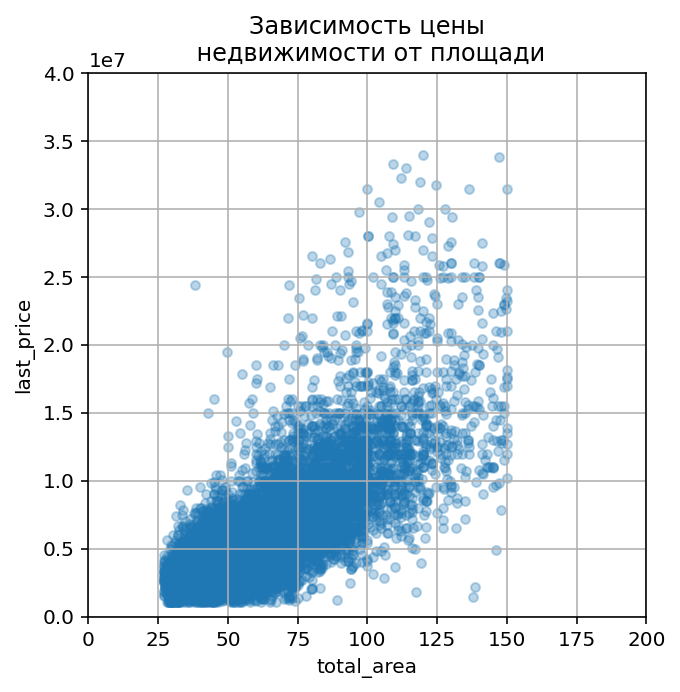

In [115]:
# построение диаграммы рассеивания
df.plot(x='total_area', y='last_price', style='o', xlim=(0, 200), ylim=(0, 40000000),grid=True, figsize=(5, 5),kind='scatter', alpha=0.3)
plt.title('Зависимость цены\n недвижимости от площади')
plt.show()

Отметим, что видна зависимость увеличения цены недвижимости с ростом площади.

Чтобы проследить соотношение цены и числа комнат построим столбчатую диаграмму.

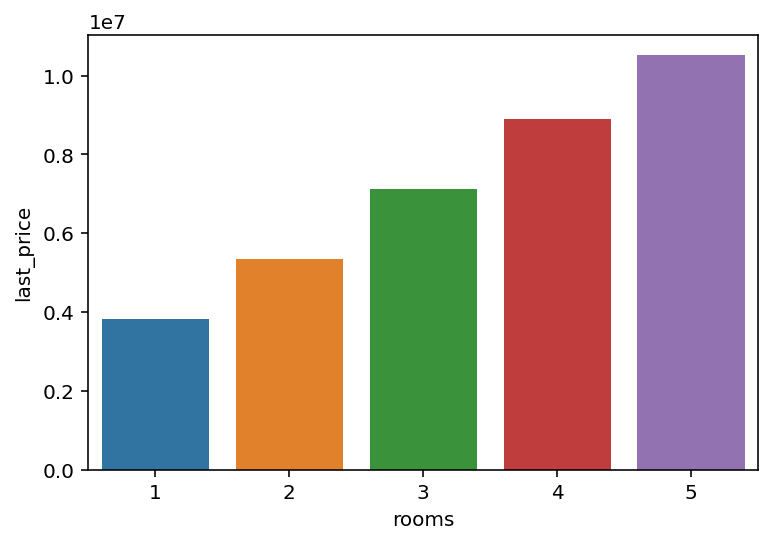

In [116]:
sns.barplot(x='rooms', y='last_price', data=df, ci=None)
plt.show()

Заметим, что видна зависимость увеличения цены недвижимости с ростом числа комнат.

Определим существует ли зависимость цены от удаления недвижимости от центра города. Для этого построим уже знакомую диаграмму рассеивания.

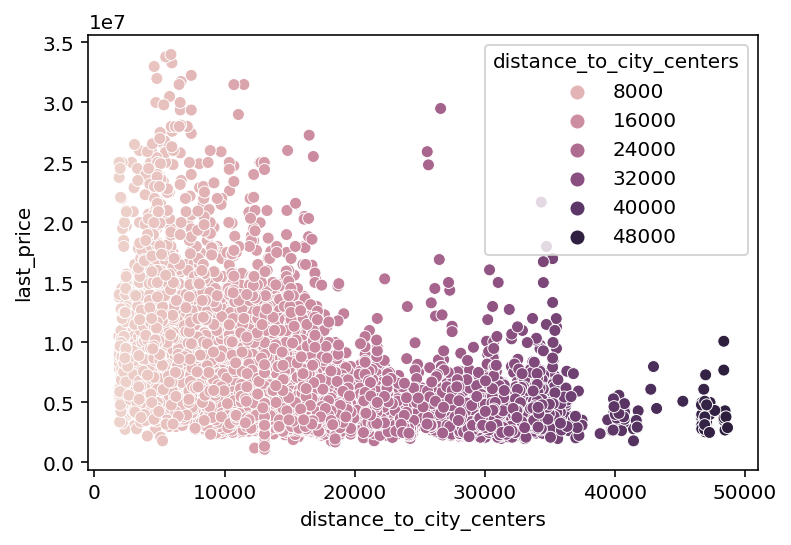

In [117]:
sns.scatterplot(x='distance_to_city_centers', y='last_price', data=df, hue='distance_to_city_centers')
plt.show()

Явно видно, что, чем ближе недвижимость к центру, тем значительно выше цена. Но есть незначительные исключения.

Чтобы проследить соотношение цены и этажа, на котором находится недвижимость построим столбчатую диаграмму.

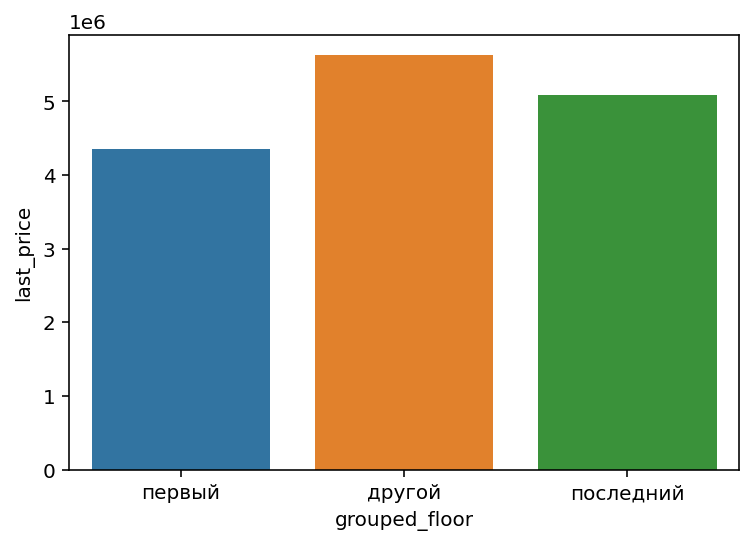

In [118]:
sns.barplot(x='grouped_floor', y='last_price', data=df, ci=None)
plt.show()

Отметим, что цена на квартиры на первом этаже ниже, чем на последнем, в то время как недвижимость на других этажах стоит дороже.

Чтобы проследить соотношение цены и дня недели построим столбчатую диаграмму.

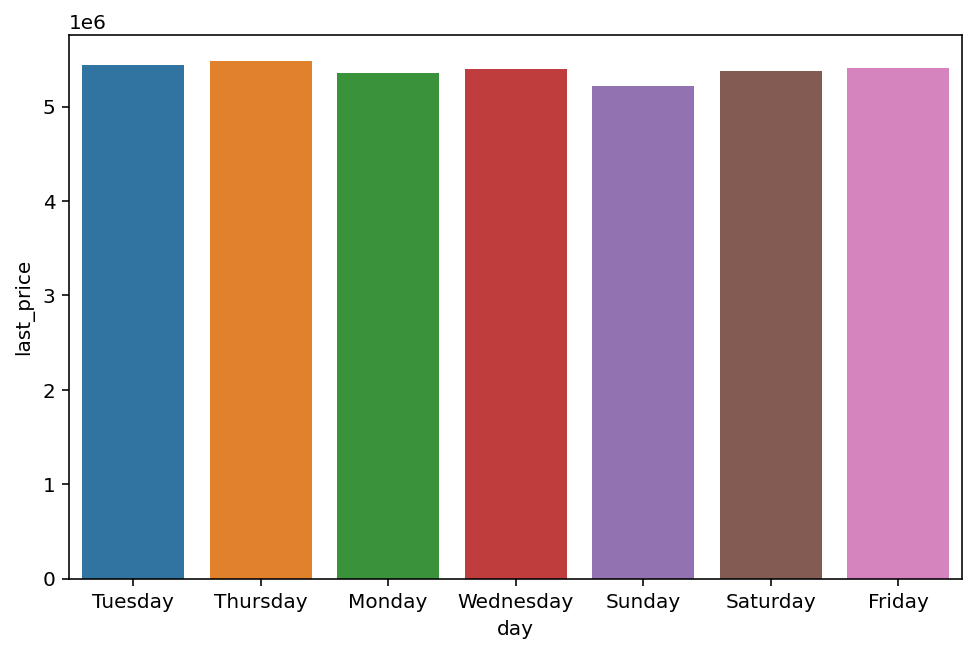

In [119]:

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='day', y='last_price', data=df, ci=None)

plt.show()

Можно сказать, что разница практически незначительна. В четверг продавались квартиры с большей ценой, а в воскресенье - с меньшей.

Чтобы проследить соотношение цены и месяца построим столбчатую диаграмму.

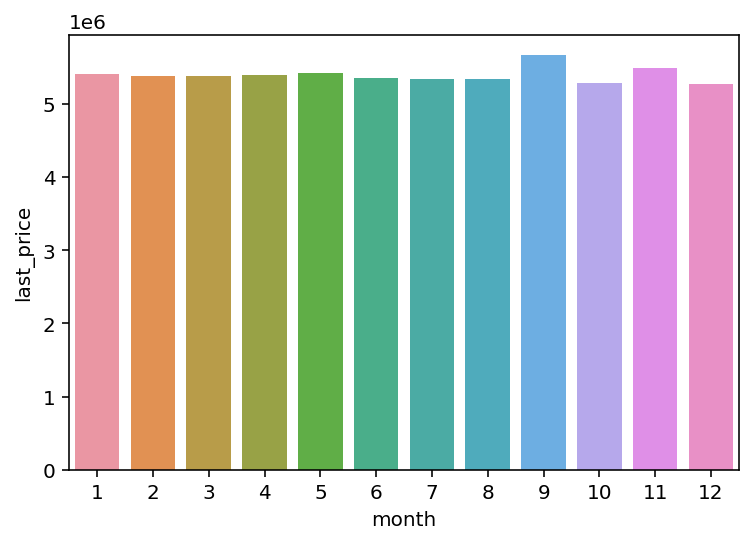

In [120]:
sns.barplot(x='month', y='last_price', data=df, ci=None)

plt.show()

Можно сказать, что разница практически незначительна. В сентябре продавались квартиры с большей ценой, в то время как в октябре произошел спад.

Чтобы проследить соотношение цены и года построим столбчатую диаграмму.

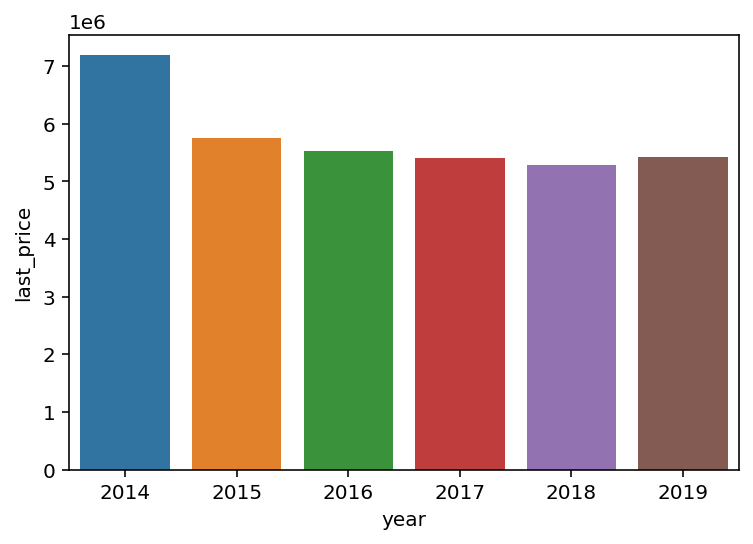

In [121]:
sns.barplot(x='year', y='last_price', data=df, ci=None)

plt.show()

Видно, что пик цен приходился на 2014 год с последовательным спадом до 2018 года включительно. И последующим незначительным подъёмом в 2019 году.

Проверим выводы, которые были сделаны ранее, опираясь на коэффициент корреляции Пирсона. Для этого сначала исследуем зависимость цены от площади, площади за квадратный метр, числа комнат и удалености от центра. А затем зависимость цены от типа этажа, дня недели, года и месяца.



In [122]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55.0,0,95065,Monday,0,9,2018,другой,0.474,0.299
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155.0,0,99195,Thursday,3,11,2017,другой,0.284,0.386


In [123]:
#Построение корреляции для площади, площади за квадратный метр, числа комнат и удалености от центра 
df[['last_price', 'price_square_meter', 'total_area', 'rooms', 'distance_to_city_centers']].corr()

,last_price,price_square_meter,total_area,rooms,distance_to_city_centers
last_price,1.000000,0.702701,0.751957,0.449814,-0.288831
price_square_meter,0.702701,1.000000,0.125997,-0.109078,-0.265876
total_area,0.751957,0.125997,1.000000,0.791240,-0.185802
rooms,0.449814,-0.109078,0.791240,1.000000,-0.124033
distance_to_city_centers,-0.288831,-0.265876,-0.185802,-0.124033,1.000000


Заметим, что связь между ценой и площадью, а также площадью за квадратный метр наблюдается высокая корреляция. Между ценой и количеством комнат слабая корреляция. И между ценой и удаленностью от центра очень слабая корреляция. Для визуализации параметров используем простой и полезный метод sns.pairplot - он отобразит корреляцию всех графиков компактным "полотном"

In [124]:
# выделение колонок из датафрейма
cols = ['last_price', 'price_square_meter', 'total_area', 'rooms', 'distance_to_city_centers']
t = df[cols]
t.head()

,last_price,price_square_meter,total_area,rooms,distance_to_city_centers
1,3350000,82920,40.4,1,18603
2,5196000,92785,56.0,2,13933
4,10000000,100000,100.0,2,8098
5,2890000,95065,30.4,1,13073
6,3700000,99195,37.3,1,19143


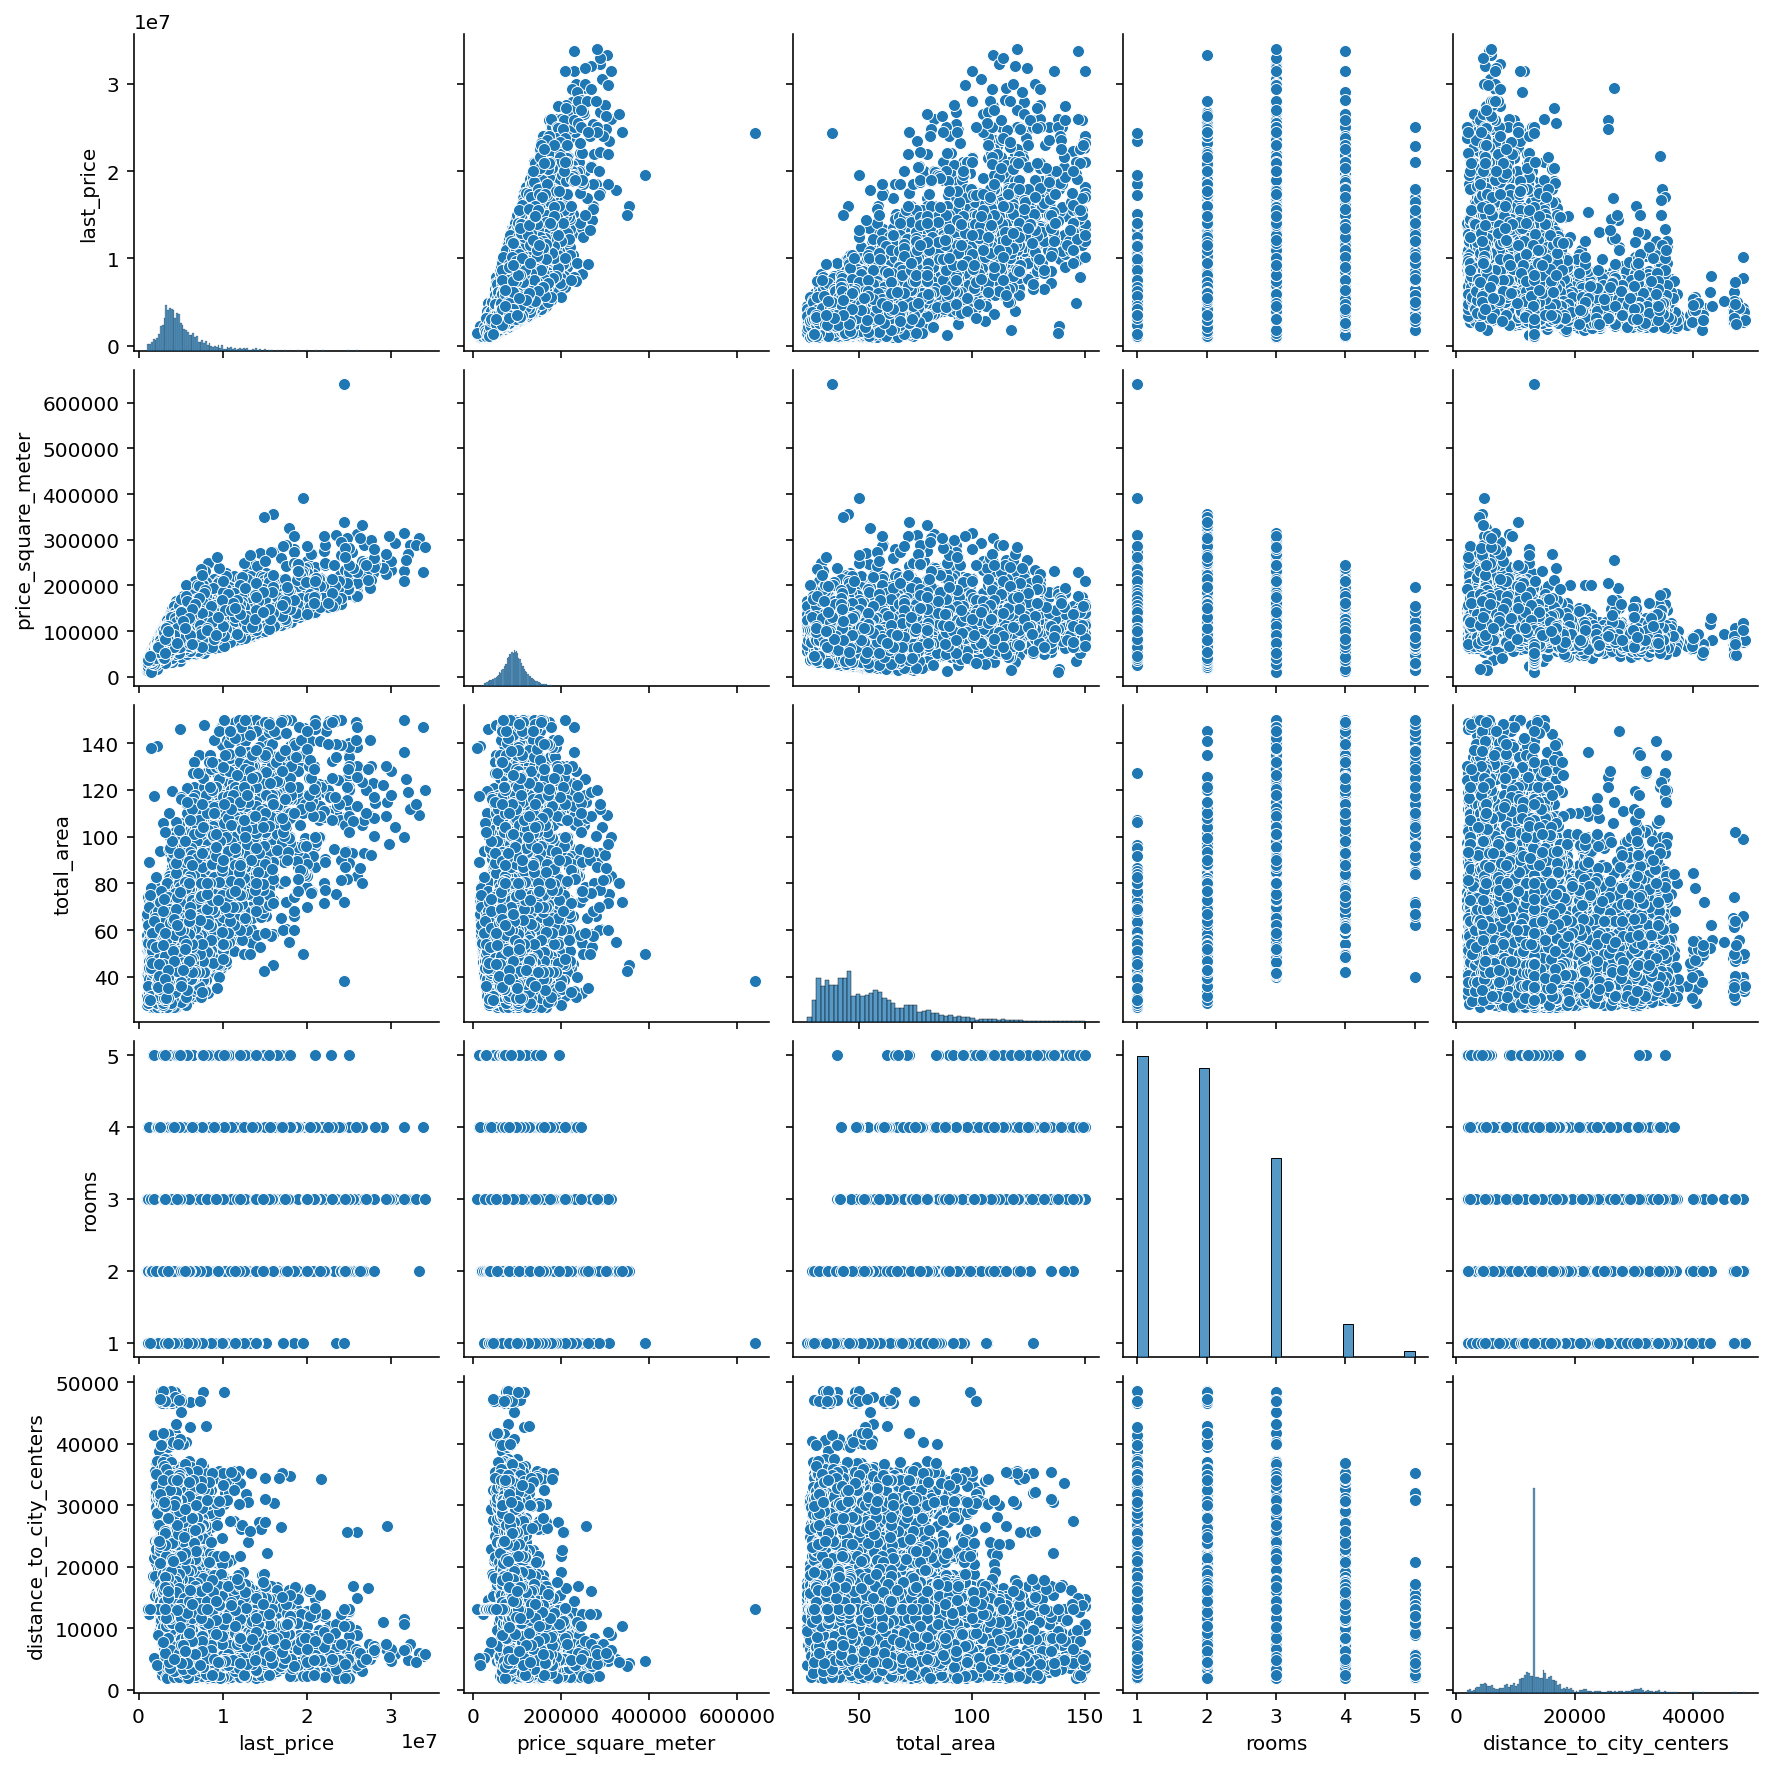

In [125]:
#построение графиков, используя метод sns.pairplot
sns.pairplot(t)
plt.show()

 Таким образом на графиках прослеживается линейная  зависимость цены от площади, площади за квадратный метр, числа комнат и удалености от центра.

 Проведём идентичные действия с зависимостью цены от типа этажа, дня недели, года и месяца.

In [126]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55.0,0,95065,Monday,0,9,2018,другой,0.474,0.299
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155.0,0,99195,Thursday,3,11,2017,другой,0.284,0.386


In [127]:
#Построение корреляции для  типа этажа, дня недели, года и месяца
df[['last_price', 'floor_number', 'day_number', 'month', 'year']].corr()

,last_price,floor_number,day_number,month,year
last_price,1.000000,0.095631,-0.005878,0.002131,-0.034513
floor_number,0.095631,1.000000,0.016298,0.018713,0.018416
day_number,-0.005878,0.016298,1.000000,0.005659,0.006128
month,0.002131,0.018713,0.005659,1.000000,-0.203791
year,-0.034513,0.018416,0.006128,-0.203791,1.000000


Заметим, что корреляция между величинами очень слабая, цена квартиры зависит от них не линейно. Рассмотрим зависимости на столбчатых диаграммах,  сгруппировав данные по первым пяти городам с наибольшим количеством объявлений.


In [128]:
#выделение первых 5 населенных пунктов
df['locality_name'].value_counts()

Санкт-Петербург          12471
посёлок Мурино             456
посёлок Шушары             395
Всеволожск                 329
Колпино                    300
                         ...  
посёлок Мельниково           1
поселок Рябово               1
деревня Пикколово            1
поселок Кингисеппский        1
деревня Рабитицы             1
Name: locality_name, Length: 288, dtype: int64

In [129]:
# формирование списка
cities_5 = ['Санкт-Петербург','посёлок Мурино', 'посёлок Шушары', 'Всеволожск','Колпино']

In [130]:
# формирование датафрейма
report = df.query('locality_name in @cities_5')
report

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,189.0,0,87454,Wednesday,2,5,2018,другой,0.465,0.266
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,0,88524,Sunday,6,2,2017,другой,0.715,0.107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,23.0,0,91089,Monday,0,4,2019,другой,0.624,0.149
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,29.0,0,100566,Wednesday,2,2,2018,другой,0.462,0.258
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,15.0,0,105769,Thursday,3,7,2018,другой,0.596,0.115
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,519.0,0,129903,Thursday,3,10,2016,другой,0.553,0.145


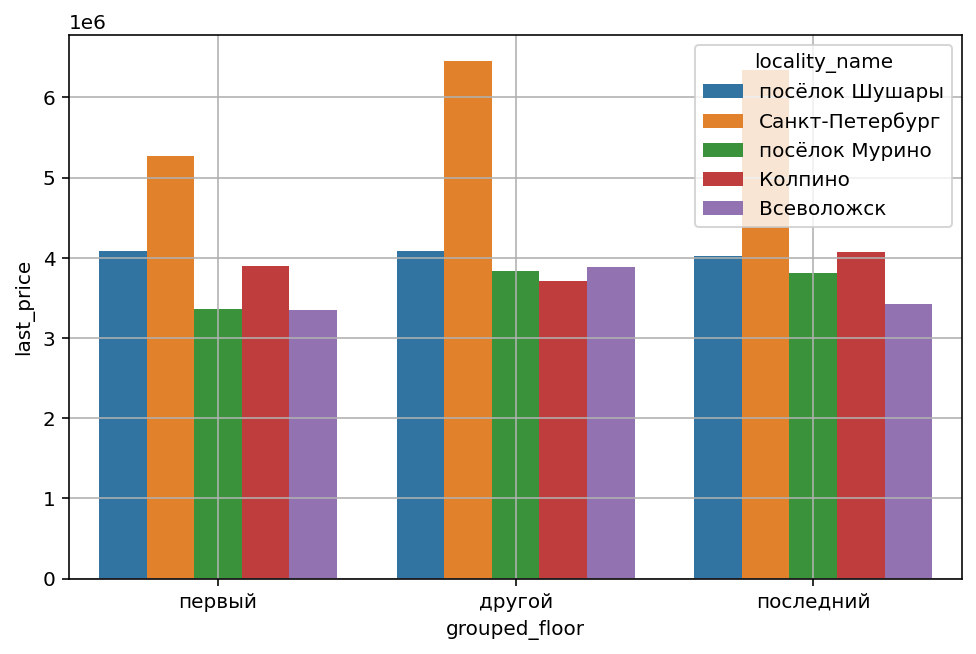

In [131]:
# график зависимости цены от типа этажа для пяти городов с наибольшим кол-вом объявлений
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='grouped_floor', y='last_price', data=report, ci=None, hue='locality_name')
plt.grid()
plt.show()



Заметим, что квартиры в Санкт-Петербурге на первом этаже стоят дешевле, чем на других. В то время как цена на последний и другие этажи не сильно разнится. Ситуация в регионах совершенно разная: в поселке Шушары цены не зависят от того, где распологается квартира, а в Колпино цена на квартиру на последнем этаже выше, чем на других. 

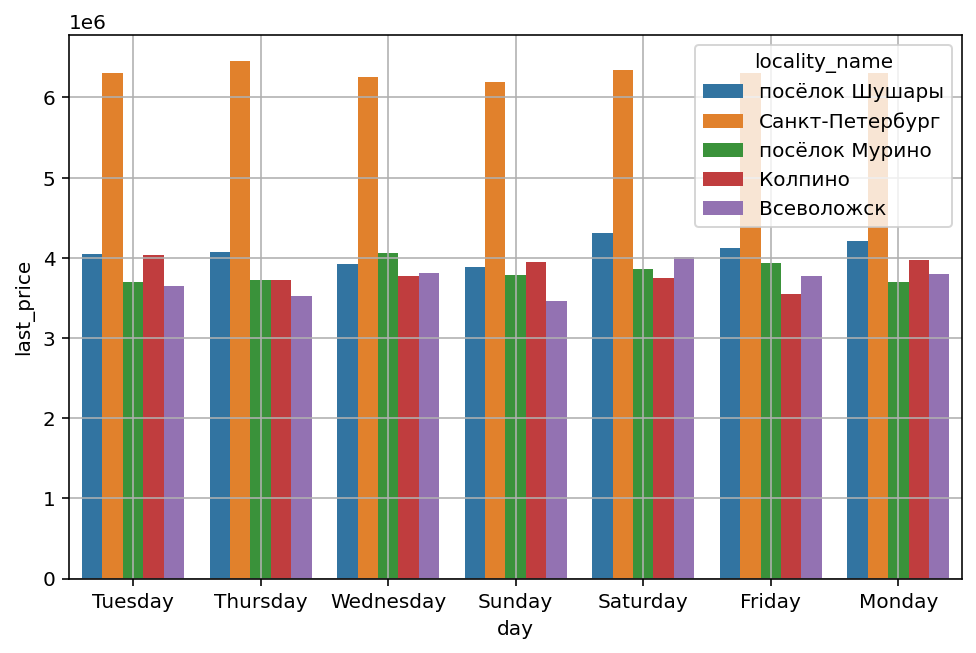

In [132]:
# график зависимости цены от дня недели для пяти городов с наибольшим кол-вом объявлений
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='day', y='last_price', data=report, ci=None, hue='locality_name')
plt.grid()
plt.show()


Заметим, что разница в продажах по дням недели незначительная. 

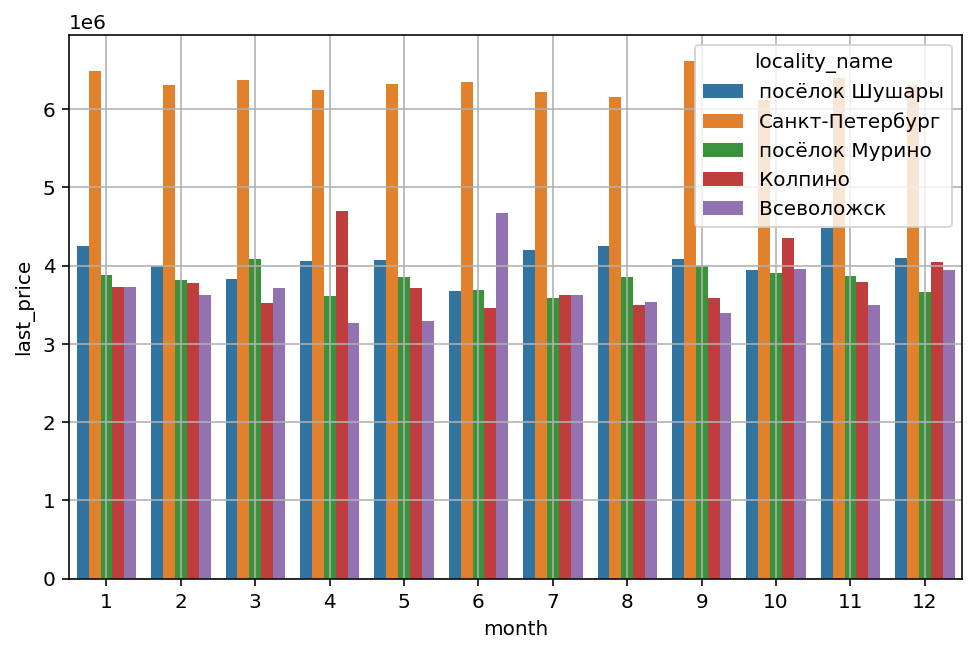

In [133]:
# график зависимости цены от месяца для пяти городов с наибольшим кол-вом объявлений
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='month', y='last_price', data=report, ci=None, hue='locality_name')
plt.grid()
plt.show()

 Заметим, что если разница в продажах по месяцам для Санк-Петербурга незначительная, то для регионов можно выделить определенные закономерности. Так для Всеволожска наибольшие продажи пришлись на июнь. 

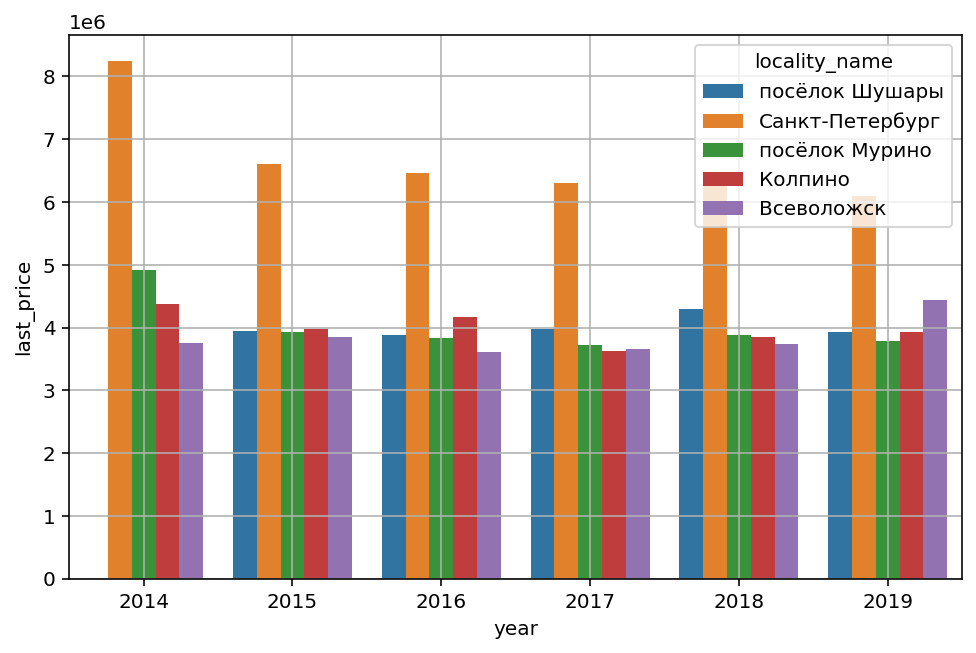

In [134]:
# график зависимости цены от года для пяти городов с наибольшим кол-вом объявлений
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='year', y='last_price', data=report, ci=None, hue='locality_name')
plt.grid()
plt.show()

 Заметим, что если для продаж по годам для Санк-Петербурга можно выявить линейную зависимость, то для регионов подобное распределение отсутствует. 

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Тажке выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [135]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55.0,0,95065,Monday,0,9,2018,другой,0.474,0.299
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155.0,0,99195,Thursday,3,11,2017,другой,0.284,0.386


In [136]:
#Выбор 10 населённых пунктов с наибольшим числом объявлений
#и подсчет  средней цены квадратного метра в этих населённых пунктах.

report = df.pivot_table(index=['locality_name'], values = 'price_square_meter', aggfunc = ['count','mean'])
report.columns = ['кол-во объявлений','средняя цена за 1 м2, руб.']
report = report.sort_values(by = ['кол-во объявлений'], ascending= False)
report.head(10)

,кол-во объявлений,"средняя цена за 1 м2, руб."
locality_name,,
Санкт-Петербург,12471,107986.158367
посёлок Мурино,456,84358.736842
посёлок Шушары,395,77328.270886
Всеволожск,329,68700.747720
Колпино,300,74664.660000
Пушкин,294,102080.993197
посёлок Парголово,292,89625.150685
деревня Кудрово,266,91778.624060
Гатчина,264,68122.196970


Заметим, что максимальное кол-во объявлений было подано из Санкт-Петербурга.

Самая высокая стоимось жилья в Санкт-Петербурге и в г.Пушкин.  Самое низкое значение из топ 10 в Выборге, Гатчине и Всеволожске.

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге . Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [137]:
# Вывод таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,0,82920,Tuesday,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,0,92785,Thursday,3,8,2015,другой,0.612,0.148
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,0,100000,Tuesday,1,6,2018,другой,0.320,0.410
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55.0,0,95065,Monday,0,9,2018,другой,0.474,0.299
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155.0,0,99195,Thursday,3,11,2017,другой,0.284,0.386


Создадим дополнительный столбец в датафрейме `distance_in_km`- расстояние в километрах. И округлим данные до целых значений.


In [138]:
df['distance_in_km'] = df['distance_to_city_centers'].apply(lambda x: x / 1000).astype('int')

Выделим квартиры в Санк-Петербурге и посчитаем среднюю цену для каждого километра.

In [139]:
report = df.query('locality_name == "Санкт-Петербург"')
report = report.pivot_table(index='distance_in_km', values='price_square_meter')
report.head()


,price_square_meter
distance_in_km,
1,122630.142857
2,121212.960396
3,114430.101370
4,131319.914992
5,131035.312500


Построим график зависимости цены от километров.

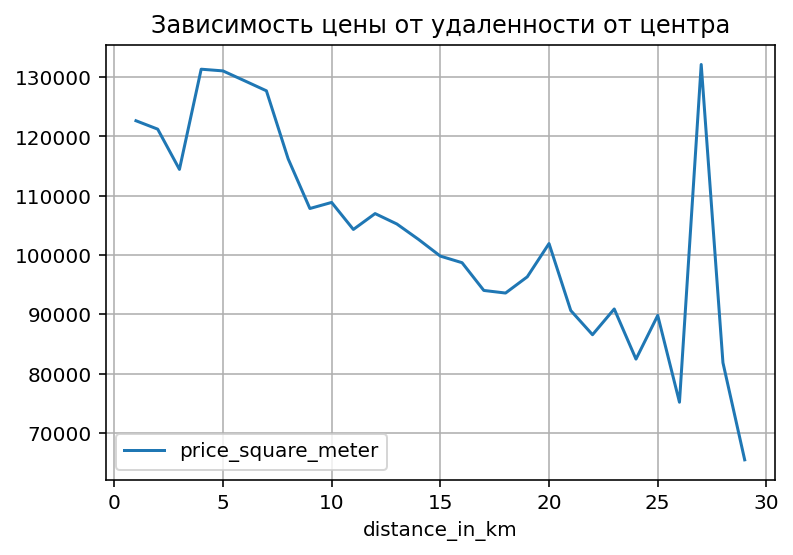

In [140]:
report.plot()
plt.title('Зависимость цены от удаленности от центра')
plt.grid()
plt.show()



Опираясь на график, можно сказать, что  центральная зона будет до 7 километра, т.к. здесь происходит значительное колебание цены.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [141]:
# Выделение сегмента квартир в центре
report = df.query('locality_name == "Санкт-Петербург" and distance_in_km <= 7' )
report.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,days_exposition_missing,price_square_meter,day,day_number,month,year,grouped_floor,ratio_living_total_area,ratio_kitchen_total_area,distance_in_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,0,66872,Saturday,5,10,2015,первый,0.478,0.202,2
35,6,15500000,149.0,2017-06-26,5,2.65,5,104.0,4,False,...,0,104026,Monday,0,6,2017,другой,0.698,0.114,3
61,18,7990000,74.0,2017-08-24,2,2.65,4,43.0,4,False,...,0,107972,Thursday,3,8,2017,последний,0.581,0.270,4
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,0,169491,Tuesday,1,9,2018,другой,0.576,0.136,4
94,3,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,0,118644,Friday,4,4,2019,другой,0.529,0.186,7


In [142]:
#анализ среднего значения и медианы
report['total_area'].describe()

count    2416.000000
mean       73.472719
std        27.504969
min        27.000000
25%        51.000000
50%        70.000000
75%        91.500000
max       150.000000
Name: total_area, dtype: float64

In [143]:
# анализ уникальных значений
report['total_area'].value_counts()

60.0     36
72.0     30
70.0     30
50.0     29
42.0     28
         ..
57.8      1
124.6     1
108.8     1
73.4      1
34.5      1
Name: total_area, Length: 766, dtype: int64

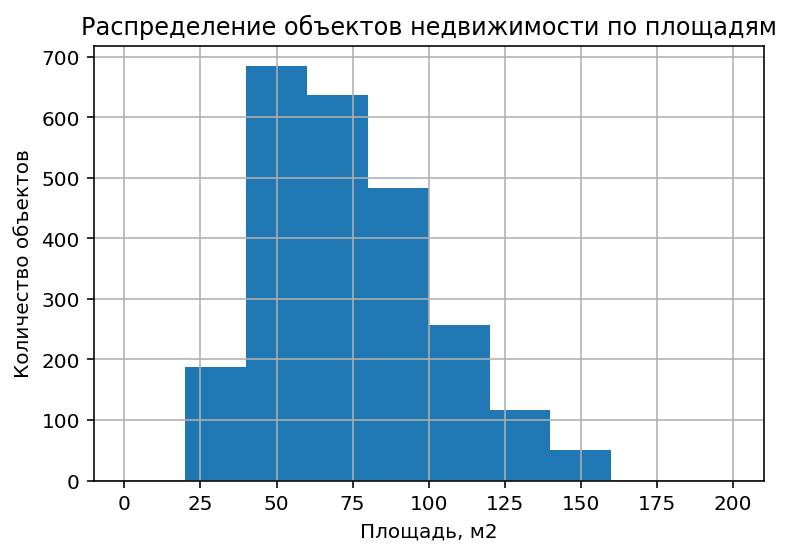

In [144]:
# Построение гистограммы по площади
plt.hist(report['total_area'], range=(0, 200))
plt.grid()
plt.xlabel("Площадь, м2"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по площадям')
plt.show()

Видно, что наибольшее число объектов в центре имеют площадь порядка 60-70 м2.

In [145]:
#анализ среднего значения и медианы
report['last_price'].describe()

count    2.416000e+03
mean     9.268482e+06
std      4.871453e+06
min      1.800000e+06
25%      6.000000e+06
50%      7.950000e+06
75%      1.100000e+07
max      3.400000e+07
Name: last_price, dtype: float64

In [146]:
# анализ уникальных значений
report['last_price'].value_counts()

8500000     43
7500000     40
6500000     32
8000000     30
6700000     26
            ..
9170000      1
7799000      1
9530000      1
10012800     1
7280000      1
Name: last_price, Length: 785, dtype: int64

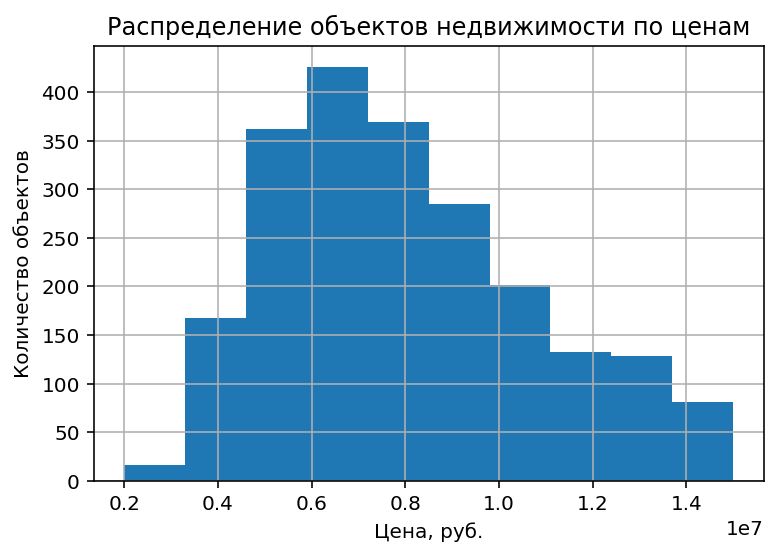

In [147]:
# Построение гистограммы по цене
plt.hist(report['last_price'], range=(2000000,15000000) )
plt.grid()
plt.xlabel("Цена, руб."), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по ценам')
plt.show()

Видно, что наибольшее число объектов в центре имеют цену порядка 7-8 млн.руб.

In [148]:
#анализ среднего значения и медианы
report['rooms'].describe()

count    2416.000000
mean        2.457781
std         1.025088
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [149]:
# анализ уникальных значений
report['rooms'].value_counts()

2    847
3    764
1    450
4    273
5     82
Name: rooms, dtype: int64

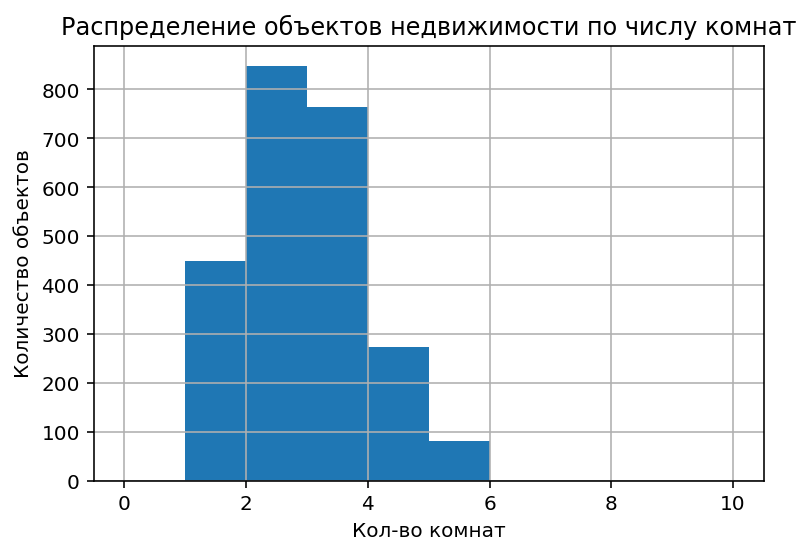

In [150]:
# Построение гистограммы по числу комнат
plt.hist(report['rooms'], range=(0,10) )
plt.grid()
plt.xlabel("Кол-во комнат"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по числу комнат')
plt.show()

Видно, что наибольшее число объектов в центре имеют 2-3 комнаты.

In [151]:
#анализ среднего значения и медианы
report['ceiling_height'].describe()

count    2416.000000
mean        2.882227
std         0.584167
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max        27.000000
Name: ceiling_height, dtype: float64

In [152]:
# анализ уникальных значений
report['ceiling_height'].value_counts()

2.65    969
3.00    292
3.20    117
2.50     95
2.70     95
       ... 
4.06      1
2.59      1
3.39      1
4.40      1
2.91      1
Name: ceiling_height, Length: 120, dtype: int64

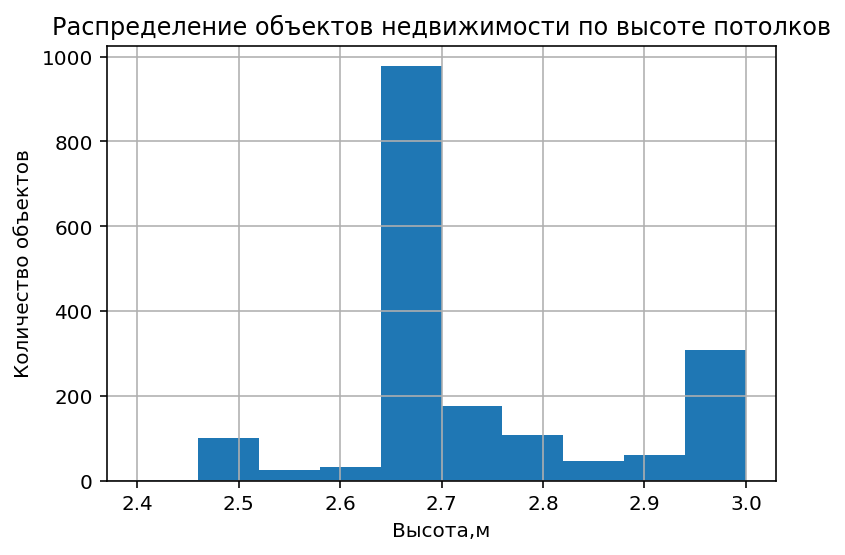

In [153]:
# Построение гистограммы по высоте потолков
plt.hist(report['ceiling_height'], range=(2.4,3) )
plt.grid()
plt.xlabel("Высота,м"), plt.ylabel("Количество объектов")
plt.title('Распределение объектов недвижимости по высоте потолков')
plt.show()

Видно, что наибольшее число объектов в центре имеют высоту потолка порядка 2.65 метра.

Чтобы проследить соотношение цены и числа комнат построим столбчатую диаграмму.

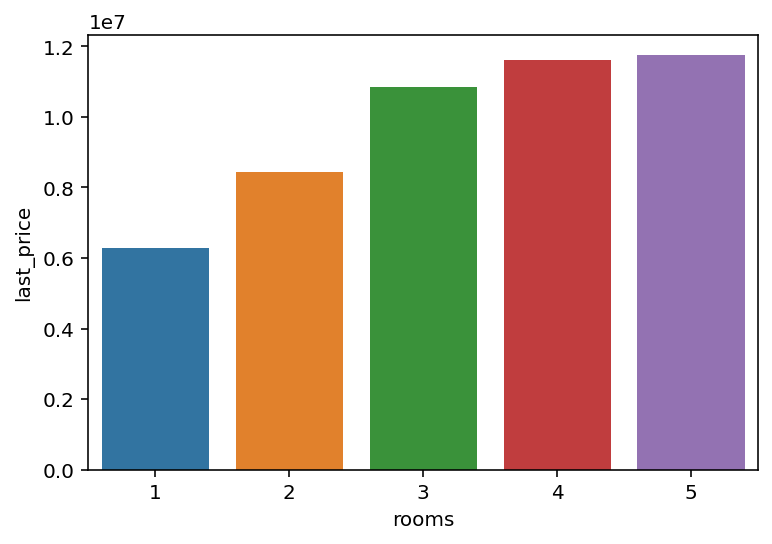

In [154]:
sns.barplot(x='rooms', y='last_price', data=report, ci=None)
plt.show()

Заметим, что видна зависимость увеличения цены недвижимости в центре с ростом числа комнат. Цена на пятикомнатные квартиры незначительно выше четырехкомнатных.

Определим существует ли зависимость цены от удаления недвижимости от центра города. . Для этого построим диаграмму рассеивания и рассчитаем коэффициент корреляции Пирсона. 

Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1.

Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.
Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.
Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции такую связь не берёт.

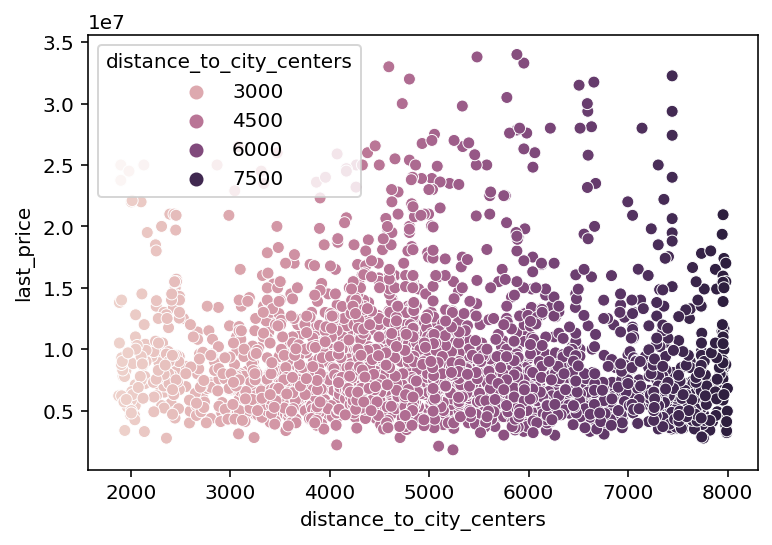

In [155]:
sns.scatterplot(x='distance_to_city_centers', y='last_price', data=report, hue='distance_to_city_centers')
plt.show()

In [156]:
# расчет коэффициента корреляции Пирсона
print(report['distance_to_city_centers'].corr(report['last_price']))

-0.053374608618061


Таким образом, опираясь на диаграмму рассеивания и коэффициент корреляции видно, что связь слабая и цена на недвижимость в центре подвержена незначительным изменениям.

Чтобы проследить соотношение цены и этажа, на котором находится недвижимость в центре построим столбчатую диаграмму.

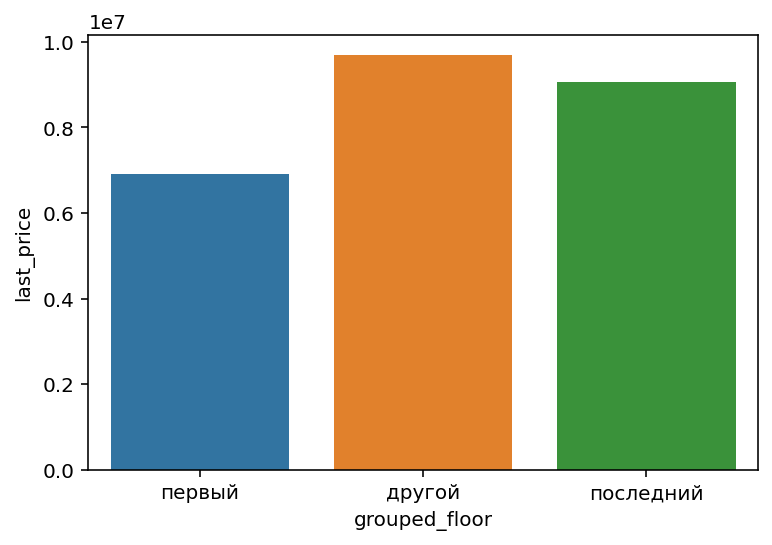

In [157]:
sns.barplot(x='grouped_floor', y='last_price', data=report, ci=None)
plt.show()

Отметим, что цена на квартиры на первом этаже ниже, чем на последнем, в то время как недвижимость на других этажах стоит дороже.

Чтобы проследить соотношение цены и дня недели построим столбчатую диаграмму.

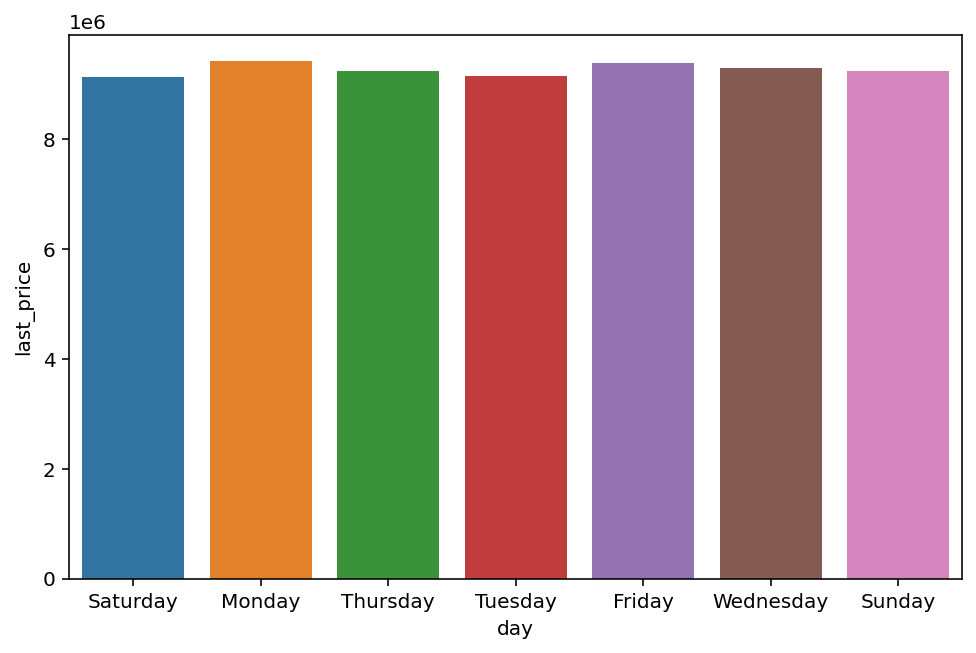

In [158]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x='day', y='last_price', data=report, ci=None)
plt.show()

Можно сказать, что разница практически незначительна. В пятницу и понедельник продавались квартиры с большей ценой, а во вторник - с меньшей.

Чтобы проследить соотношение цены и месяца построим столбчатую диаграмму.

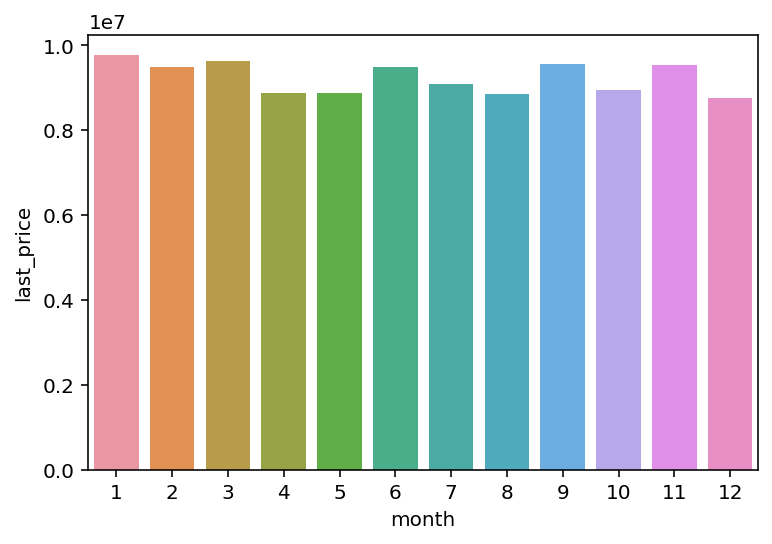

In [159]:
sns.barplot(x='month', y='last_price', data=report, ci=None)

plt.show()

Заметим, что в январе, марте и сентябре продавались квартиры с большей ценой, в то время как в декабре цена была минимальной.

Чтобы проследить соотношение цены и года построим столбчатую диаграмму.

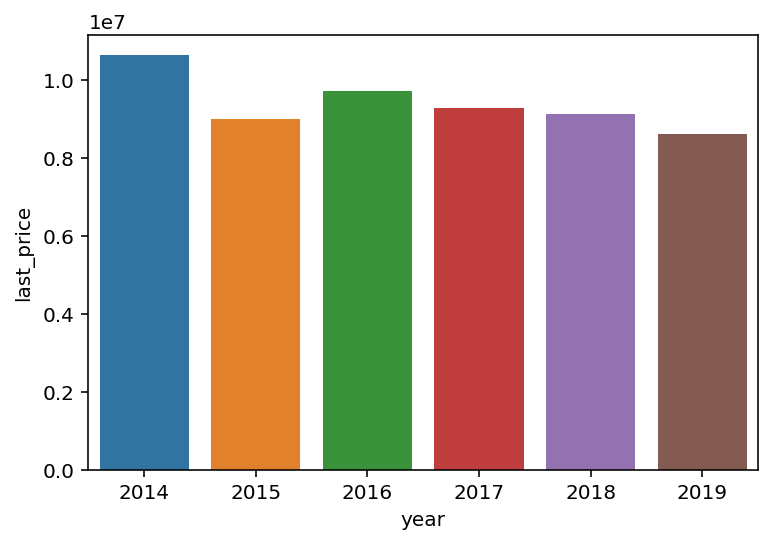

In [160]:
sns.barplot(x='year', y='last_price', data=report, ci=None)
plt.show()

Видно, что пик цен приходился на 2014 и 2016 годы, а минимальная цена была в 2019 году.

### Вывод 

Рассмотрим таблицу 1, зависимости параметров квартиры от расположения(в центре или регионе), а также таблицу 2, зависимости факторов, которые влияют на стоймость квартиры(в центре или регионе).

<center> <b> Таблица 1. <b>    </center>  
    

| **Параметры**   	| **Центр** 	| **Регион** 	|
|-----------------	|-----------	|------------	|
| Площадь, м2     	| 60-70     	| 45-55      	|
| Цена, млн.руб   	| 7-8       	| 4-4.5      	|
| Число комнат    	| 2-3       	| 1-2        	|
| Высота потолков 	| 2.65      	| 2.65       	|
    
    
    
<center> <b> Таблица 2. <b>    </center>   

|      **Факторы**      	|                      **Зависимость цены<br> в центре**                     	|                              **Зависимость цены<br> в регионе**                             	|
|:---------------------:	|:--------------------------------------------------------------------------:	|:-------------------------------------------------------------------------------------------:	|
| Число комнат          	| Линейная                                                                   	| Линейная                                                                                    	|
| Удаленность от центра 	| нет                                                                        	| Линейная                                                                                    	|
| Этаж                  	| Первый-последний-другой                                                    	| Первый-последний-другой                                                                     	|
| День недели           	| Незначительная.<br>Максимум: пятница,<br>понедельник.<br>Минимум: вторник. 	| Незначительная.<br>Максимум: четверг.<br>Минимум: воскресенье.                              	|
| Месяц                 	| Максимум:январь,март,<br>сентябрь.<br>Минимум:декабрь.                	| Незначительная<br>Максимум: сентябрь.<br>Минимум: октябрь.                                  	|
| Год                   	| <br>Максимум: 2014, 2016 год.<br>Минимум: 2019 год.                        	| Линейный спад с 2014 года<br>и подъем в 2019. <br>Максимум: 2014 год.<br>Минимум: 2018 год. 	|

Обратим внимание, что площадь квартир и кол-во комнат в центре больше по сравнению с регионом, что отражается на цене, в то время как высоты потолков, которые регулируется строительными нормами, абсолютно совпадают.

Также заметим:
- не наблюдаются расхождения  между распределением цен по числу комнтат в центре и в регионе;
- обнаруживается линейная зависимость цены от удаленности от центра в регионе, чего нет в центре;
- распределение цены в зависимости от этажа идентично в центре и в регионе;
- пик цен в центре и регионе приходился на 2014 год. С минимальными показателями по центру в 2019 году, в то время как в регионе наблюдался подъем.

## Общий вывод

Мы научились определять рыночную стоимость объектов недвижимости.

Установили параметры, которые влияют на цену.

Осуществили анализ данных для дальнейшего построения автоматизированной системы, которая позволит отследить аномалии и мошенническую деятельность.
